# Obtain

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
## Import functions made specifically for this project
from capstone_functions import *

In [3]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 100
pd.options.display.max_rows = 120

In [4]:
## Load in voter registration data for Union County
uc_vreg = pd.read_table('Data/ncvoter90.zip', encoding='ISO-8859-1')
uc_vreg.head()

county_id county_desc  voter_reg_num status_cd voter_status_desc reason_cd  \
0         90       UNION         346446         A            ACTIVE        AV   
1         90       UNION         348004         A            ACTIVE        AV   
2         90       UNION         281016         A            ACTIVE        AV   
3         90       UNION         288489         A            ACTIVE        AV   
4         90       UNION         279308         A            ACTIVE        AV   

  voter_status_reason_desc absent_ind name_prefx_cd last_name first_name  \
0                 VERIFIED                             AALAEI       ARIO   
1                 VERIFIED                             AALAEI    KAVITHA   
2                 VERIFIED                            AALBORG     ALEXIS   
3                 VERIFIED                            AALBORG      BRYAN   
4                 VERIFIED                            AALBORG     SHARON   

    middle_name name_suffix_lbl         res_street_address res_city_desc  \
0           NaN             NaN   4009  MILLBRIDGE PKWY           WAXHAW   
1           NaN             NaN   4009  MILLBRIDGE PKWY           WAXHAW   
2         LEANN             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   
3           LEE             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   
4  SCHLEENBAKER             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   

  state_cd  zip_code             mail_addr1 mail_addr2 mail_addr3 mail_addr4  \
0       NC   28173.0   4009 MILLBRIDGE PKWY        NaN        NaN        NaN   
1       NC   28173.0   4009 MILLBRIDGE PKWY        NaN        NaN        NaN   
2       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   
3       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   
4       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   

      mail_city mail_state mail_zipcode  full_phone_number race_code  \
0        WAXHAW         NC        28173                NaN         W   
1        WAXHAW         NC        28173                NaN         A   
2  INDIAN TRAIL         NC        28079                NaN         W   
3  INDIAN TRAIL         NC        28079                NaN         W   
4  INDIAN TRAIL         NC        28079                NaN         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      DEM           F         46          OC           Y   
2          NL      UNA           F         26          IA           Y   
3          UN      UNA           M         62          OK           Y   
4          NL      REP           F         62          PA           Y   

   registr_dt precinct_abbrv precinct_desc  municipality_abbrv  \
0  04/25/2019           020A          020A                 5.0   
1  06/24/2019           020A          020A                 5.0   
2  11/04/2013           029A          029A                 6.0   
3  09/17/2014           029A          029A                 6.0   
4  07/24/2013           029A          029A                 6.0   

  municipality_desc  ward_abbrv  ward_desc  cong_dist_abbrv super_court_abbrv  \
0            WAXHAW         NaN        NaN              9.0               20B   
1            WAXHAW         NaN        NaN              9.0               20B   
2      INDIAN TRAIL         NaN        NaN              9.0               20B   
3      INDIAN TRAIL         NaN        NaN              9.0               20B   
4      INDIAN TRAIL         NaN        NaN              9.0               20B   

  judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  county_commiss_abbrv  \
0              20C             35.0            68.0                   NaN   
1              20C             35.0            68.0                   NaN   
2              20C             35.0            68.0                   NaN   
3              20C             35.0            68.0      

In [5]:
## Load in voter history data for Union County
uc_vhis = pd.read_table('Data/ncvhis90.zip')
uc_vhis.head()

county_id county_desc  voter_reg_num election_lbl       election_desc  \
0         90       UNION         285297   11/06/2018  11/06/2018 GENERAL   
1         90       UNION         285297   11/03/2020  11/03/2020 GENERAL   
2         90       UNION         285297   11/08/2016  11/08/2016 GENERAL   
3         90       UNION         285297   09/10/2019  09/10/2019 GENERAL   
4         90       UNION         285297   03/03/2020  03/03/2020 PRIMARY   

      voting_method voted_party_cd voted_party_desc pct_label pct_description  \
0  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
1  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
2  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
3  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
4         IN-PERSON            REP       REPUBLICAN       016             016   

       ncid  voted_county_id voted_county_desc vtd_label vtd_description  
0  AA100547               90             UNION       016             016  
1  AA100547               90             UNION       016             016  
2  AA100547               90             UNION       016             016  
3  AA100547               90             UNION       016             016  
4  AA100547               90             UNION       016             016

# Scrub and Explore (Part I)

In [6]:
## Check metadata for voter registration dataframe
uc_vreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183969 entries, 0 to 183968
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   county_id                 183969 non-null  int64  
 1   county_desc               183969 non-null  object 
 2   voter_reg_num             183969 non-null  int64  
 3   status_cd                 183969 non-null  object 
 4   voter_status_desc         183969 non-null  object 
 5   reason_cd                 183969 non-null  object 
 6   voter_status_reason_desc  183969 non-null  object 
 7   absent_ind                183969 non-null  object 
 8   name_prefx_cd             183969 non-null  object 
 9   last_name                 183965 non-null  object 
 10  first_name                183967 non-null  object 
 11  middle_name               168871 non-null  object 
 12  name_suffix_lbl           20984 non-null   object 
 13  res_street_address        183969 non-null  o

In [7]:
## Check metadata for voter history dataframe
uc_vhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806996 entries, 0 to 806995
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   county_id          806996 non-null  int64 
 1   county_desc        806996 non-null  object
 2   voter_reg_num      806996 non-null  int64 
 3   election_lbl       806996 non-null  object
 4   election_desc      806996 non-null  object
 5   voting_method      806996 non-null  object
 6   voted_party_cd     806932 non-null  object
 7   voted_party_desc   806932 non-null  object
 8   pct_label          806996 non-null  object
 9   pct_description    806996 non-null  object
 10  ncid               806996 non-null  object
 11  voted_county_id    806996 non-null  int64 
 12  voted_county_desc  806996 non-null  object
 13  vtd_label          806828 non-null  object
 14  vtd_description    806828 non-null  object
dtypes: int64(3), object(12)
memory usage: 92.4+ MB


## Explore Duplicate Records

In [8]:
## Check for duplicate entries in voter registration data
uc_vreg.duplicated().sum()

0

In [9]:
## Check for duplicate entries in voter history data
uc_vhis.duplicated().sum()

132

In [10]:
## Inspect duplicate entries in voter history data
exact_dup_vhis = uc_vhis.loc[uc_vhis.duplicated()]
exact_dup_vhis

county_id county_desc  voter_reg_num election_lbl       election_desc  \
9023           90       UNION         325228   03/03/2020  03/03/2020 PRIMARY   
9025           90       UNION         325228   09/10/2019  09/10/2019 GENERAL   
26366          90       UNION         205258   11/06/2012  11/06/2012 GENERAL   
35914          90       UNION         338757   11/06/2018  11/06/2018 GENERAL   
74971          90       UNION         204911   11/06/2012  11/06/2012 GENERAL   
...           ...         ...            ...          ...                 ...   
746626         90       UNION          10836   11/08/2016  11/08/2016 GENERAL   
767799         90       UNION         338953   11/06/2018  11/06/2018 GENERAL   
768673         90       UNION         167702   05/08/2012  05/08/2012 PRIMARY   
773146         90       UNION         271801   11/06/2012  11/06/2012 GENERAL   
782229         90       UNION         172038   11/06/2012  11/06/2012 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
9023    ABSENTEE ONESTOP            DEM       DEMOCRATIC      020A   
9025           IN-PERSON            DEM       DEMOCRATIC      020A   
26366   ABSENTEE ONESTOP            UNA     UNAFFILIATED      029C   
35914        PROVISIONAL            REP       REPUBLICAN      037A   
74971   ABSENTEE ONESTOP            DEM       DEMOCRATIC       036   
...                  ...            ...              ...       ...   
746626  ABSENTEE ONESTOP            REP       REPUBLICAN       024   
767799       PROVISIONAL            UNA     UNAFFILIATED       012   
768673         IN-PERSON            REP       REPUBLICAN       036   
773146  ABSENTEE ONESTOP            REP       REPUBLICAN       042   
782229         IN-PERSON            UNA     UNAFFILIATED       013   

       pct_description       ncid  voted_county_id voted_county_desc  \
9023              020A   AN168178               90             UNION   
9025              020A   AN168178               90             UNION   
26366             029C    CE19807               90             UNION   
35914             037A  CW1070559               90             UNION   
74971              036   CW455149               90             UNION   
...                ...        ...              ...               ...   
746626             024     EF8430               90             UNION   
767799             012    EF90843               90             UNION   
768673             036    EF91060               90             UNION   
773146             042    EF92439               90             UNION   
782229             013    EF95396               90             UNION   

       vtd_label vtd_description  
9023        020A            020A  
9025        020A            020A  
26366       029C            029C  
35914       037A            037A  
74971        036             036  
...          ...             ...  
746626       024             024  
767799       012             012  
768673       036             036  
773146       042             042  
782229       013             013  

[132 rows x 15 columns]

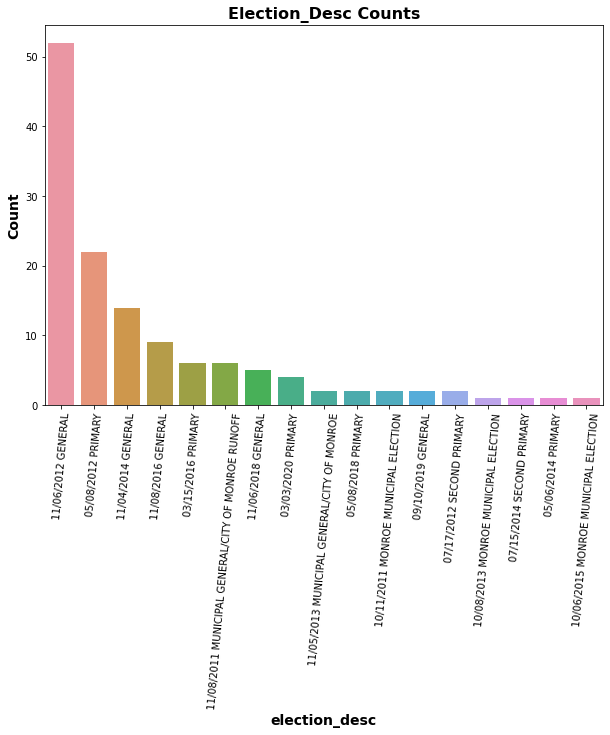

In [11]:
plot_count('election_desc', exact_dup_vhis, rotation=85);

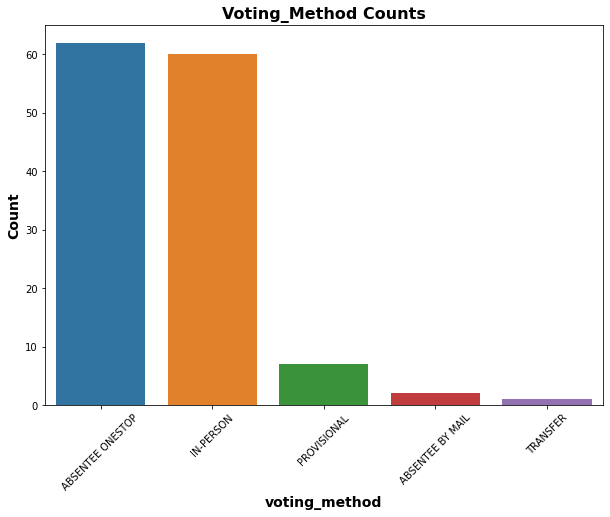

In [12]:
plot_count('voting_method', exact_dup_vhis, rotation=45);

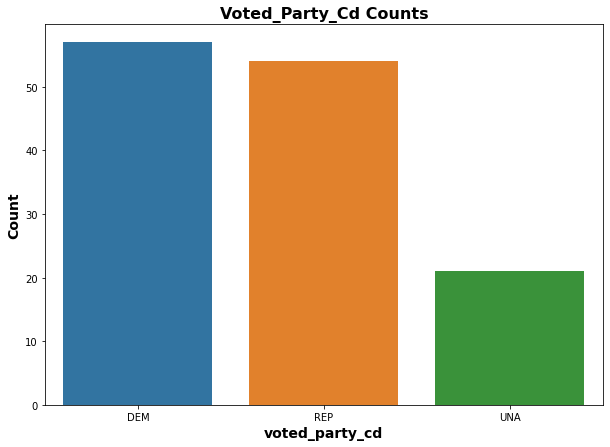

In [13]:
plot_count('voted_party_cd', exact_dup_vhis);

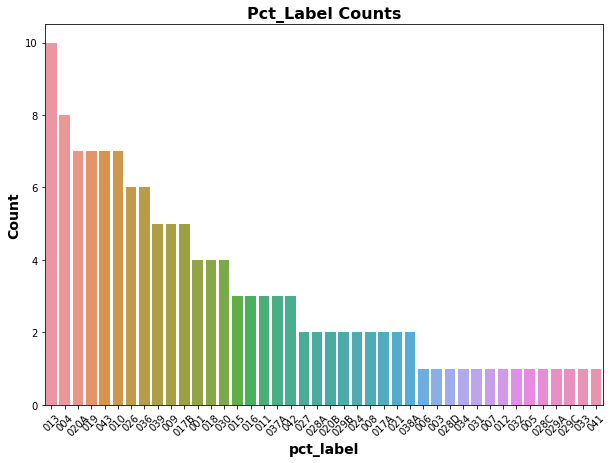

In [14]:
plot_count('pct_label', exact_dup_vhis, rotation=45);

In [15]:
## Remove exact duplicate entries from records of voter history
uc_vhis.drop_duplicates(inplace=True)

In [16]:
## There are 9 instances where an ncid shows up as casting a vote
  ## more than once in the same election where the records aren't exact copies
uc_vhis.duplicated(subset=['ncid','election_desc']).sum()

9

In [17]:
## A total of 7 individuals show up more than once for a single election
dup_ncid_elecs = uc_vhis.loc[uc_vhis.duplicated(subset=['ncid', 'election_desc'], keep=False)]
display(dup_ncid_elecs.head())
dup_ncid_elecs['ncid'].nunique()

county_id county_desc  voter_reg_num election_lbl       election_desc  \
31344          90       UNION         338735   11/06/2018  11/06/2018 GENERAL   
31349          90       UNION         338735   11/06/2018  11/06/2018 GENERAL   
148324         90       UNION         364740   11/06/2012  11/06/2012 GENERAL   
148325         90       UNION         364740   03/15/2016  03/15/2016 PRIMARY   
148328         90       UNION         364740   11/08/2016  11/08/2016 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
31344        PROVISIONAL            REP       REPUBLICAN      020B   
31349          IN-PERSON            REP       REPUBLICAN       058   
148324  ABSENTEE ONESTOP            UNA     UNAFFILIATED       W25   
148325  ABSENTEE ONESTOP            DEM       DEMOCRATIC       W16   
148328  ABSENTEE ONESTOP            UNA     UNAFFILIATED       W16   

       pct_description       ncid  voted_county_id voted_county_desc  \
31344             020B  CW1012090               90             UNION   
31349          PCT 058  CW1012090               60       MECKLENBURG   
148324             W25   DB153036               65       NEW HANOVER   
148325             W16   DB153036               65       NEW HANOVER   
148328             W16   DB153036               65       NEW HANOVER   

       vtd_label vtd_description  
31344       020B            020B  
31349        058             058  
148324       W25             W25  
148325       W16             W16  
148328       W16             W16

7

In [18]:
## Examine the complete recent voting history of the 7 ncid's that show up 
  ## multiple times for a single election to investigate how the records differ
for ncid in dup_ncid_elecs['ncid'].unique():
    display(uc_vhis.loc[uc_vhis['ncid']==ncid].sort_values(['election_desc']))

county_id county_desc  voter_reg_num election_lbl  \
31343         90       UNION         338735   03/03/2020   
31342         90       UNION         338735   09/10/2019   
31346         90       UNION         338735   11/03/2015   
31345         90       UNION         338735   11/03/2020   
31347         90       UNION         338735   11/04/2014   
31341         90       UNION         338735   11/05/2019   
31344         90       UNION         338735   11/06/2018   
31349         90       UNION         338735   11/06/2018   
31348         90       UNION         338735   11/08/2016   

              election_desc     voting_method voted_party_cd voted_party_desc  \
31343    03/03/2020 PRIMARY  ABSENTEE ONESTOP            REP       REPUBLICAN   
31342    09/10/2019 GENERAL         IN-PERSON            REP       REPUBLICAN   
31346    11/03/2015 GENERAL         IN-PERSON            REP       REPUBLICAN   
31345    11/03/2020 GENERAL  ABSENTEE ONESTOP            REP       REPUBLICAN   
31347    11/04/2014 GENERAL         IN-PERSON            REP       REPUBLICAN   
31341  11/05/2019 MUNICIPAL         IN-PERSON            REP       REPUBLICAN   
31344    11/06/2018 GENERAL       PROVISIONAL            REP       REPUBLICAN   
31349    11/06/2018 GENERAL         IN-PERSON            REP       REPUBLICAN   
31348    11/08/2016 GENERAL         IN-PERSON            REP       REPUBLICAN   

      pct_label pct_description       ncid  voted_county_id voted_county_desc  \
31343      020B            020B  CW1012090               90             UNION   
31342      020B            020B  CW1012090               90             UNION   
31346       058         PCT 058  CW1012090               60       MECKLENBURG   
31345      020B            020B  CW1012090               90             UNION   
31347       148         PCT 148  CW1012090               60       MECKLENBURG   
31341      020B            020B  CW1012090               90             UNION   
31344      020B            020B  CW1012090               90             UNION   
31349       058         PCT 058  CW1012090               60       MECKLENBURG   
31348       058         PCT 058  CW1012090               60       MECKLENBURG   

      vtd_label vtd_description  
31343      020B            020B  
31342      020B            020B  
31346       058             058  
31345      020B            020B  
31347       148             148  
31341      020B            020B  
31344      020B            020B  
31349       058             058  
31348       058             058

county_id county_desc  voter_reg_num election_lbl       election_desc  \
148325         90       UNION         364740   03/15/2016  03/15/2016 PRIMARY   
148331         90       UNION         364740   03/15/2016  03/15/2016 PRIMARY   
148323         90       UNION         364740   05/08/2012  05/08/2012 PRIMARY   
148329         90       UNION         364740   11/03/2020  11/03/2020 GENERAL   
148327         90       UNION         364740   11/04/2014  11/04/2014 GENERAL   
148324         90       UNION         364740   11/06/2012  11/06/2012 GENERAL   
148332         90       UNION         364740   11/06/2012  11/06/2012 GENERAL   
148326         90       UNION         364740   11/06/2018  11/06/2018 GENERAL   
148328         90       UNION         364740   11/08/2016  11/08/2016 GENERAL   
148330         90       UNION         364740   11/08/2016  11/08/2016 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
148325  ABSENTEE ONESTOP            DEM       DEMOCRATIC       W16   
148331         IN-PERSON            REP       REPUBLICAN      0070   
148323         IN-PERSON            DEM       DEMOCRATIC       W25   
148329  ABSENTEE ONESTOP            REP       REPUBLICAN      020A   
148327  ABSENTEE ONESTOP            UNA     UNAFFILIATED       W16   
148324  ABSENTEE ONESTOP            UNA     UNAFFILIATED       W25   
148332  ABSENTEE ONESTOP            REP       REPUBLICAN      0070   
148326         IN-PERSON            UNA     UNAFFILIATED      CF02   
148328  ABSENTEE ONESTOP            UNA     UNAFFILIATED       W16   
148330  ABSENTEE ONESTOP            REP       REPUBLICAN      0070   

       pct_description      ncid  voted_county_id voted_county_desc vtd_label  \
148325             W16  DB153036               65       NEW HANOVER       W16   
148331           SALEM  DB153036               12             BURKE      0070   
148323             W25  DB153036               65       NEW HANOVER       W25   
148329            020A  DB153036               90             UNION      020A   
148327             W16  DB153036               65       NEW HANOVER       W16   
148324             W25  DB153036               65       NEW HANOVER       W25   
148332           SALEM  DB153036               12             BURKE      0070   
148326            CF02  DB153036               65       NEW HANOVER      CF02   
148328             W16  DB153036               65       NEW HANOVER       W16   
148330           SALEM  DB153036               12             BURKE      0070   

       vtd_description  
148325             W16  
148331            0070  
148323             W25  
148329            020A  
148327             W16  
148324             W25  
148332            0070  
148326            CF02  
148328             W16  
148330            0070

county_id county_desc  voter_reg_num election_lbl  \
371273         90       UNION         252400   03/03/2020   
371268         90       UNION         252400   03/15/2016   
371275         90       UNION         252400   05/08/2012   
371271         90       UNION         252400   09/10/2019   
371270         90       UNION         252400   11/03/2020   
371272         90       UNION         252400   11/04/2014   
371277         90       UNION         252400   11/05/2019   
371274         90       UNION         252400   11/06/2012   
371269         90       UNION         252400   11/06/2018   
371278         90       UNION         252400   11/07/2017   
371279         90       UNION         252400   11/08/2011   
371276         90       UNION         252400   11/08/2016   
371280         90       UNION         252400   11/08/2016   

                                            election_desc     voting_method  \
371273                                 03/03/2020 PRIMARY         IN-PERSON   
371268                                 03/15/2016 PRIMARY         IN-PERSON   
371275                                 05/08/2012 PRIMARY         IN-PERSON   
371271                                 09/10/2019 GENERAL         IN-PERSON   
371270                                 11/03/2020 GENERAL  ABSENTEE ONESTOP   
371272                                 11/04/2014 GENERAL         IN-PERSON   
371277                               11/05/2019 MUNICIPAL         IN-PERSON   
371274                                 11/06/2012 GENERAL         IN-PERSON   
371269                                 11/06/2018 GENERAL         IN-PERSON   
371278                               11/07/2017 MUNICIPAL         IN-PERSON   
371279  11/08/2011 MUNICIPAL GENERAL/CITY OF MONROE RU...         IN-PERSON   
371276                                 11/08/2016 GENERAL         IN-PERSON   
371280                                 11/08/2016 GENERAL  ABSENTEE ONESTOP   

       voted_party_cd voted_party_desc pct_label pct_description      ncid  \
371273            DEM       DEMOCRATIC      028D            028D  EF164225   
371268            DEM       DEMOCRATIC      028D            028D  EF164225   
371275            DEM       DEMOCRATIC      028D            028D  EF164225   
371271            DEM       DEMOCRATIC      028D            028D  EF164225   
371270            DEM       DEMOCRATIC      028D            028D  EF164225   
371272            DEM       DEMOCRATIC      028D            028D  EF164225   
371277            DEM       DEMOCRATIC      028D            028D  EF164225   
371274            DEM       DEMOCRATIC      028D            028D  EF164225   
371269            DEM       DEMOCRATIC      028D            028D  EF164225   
371278            DEM       DEMOCRATIC      028D            028D  EF164225   
371279            DEM       DEMOCRATIC      028D            028D  EF164225   
371276            DEM       DEMOCRATIC      028D            028D  EF164225   
371280            REP       REPUBLICAN       022         PCT 022  EF164225   

        voted_county_id voted_county_desc vtd_label vtd_description  
371273               90             UNION       028             028  
371268               90             UNION       028             028  
371275               90             UNION       028             028  
371271               90             UNION       028             028  
371270               90             UNION       028             028  
371272               90             UNION       028             028  
371277               90             UNION       028             028  
371274               90             UNION       028             028  
371269               90             UNION       028             028  
371278               90             UNION       028             028  
371279               90             UNION       028             028  
371276               90             UNION       028             028  
371280               60       MECKLENBURG  

county_id county_desc  voter_reg_num election_lbl       election_desc  \
434761         90       UNION         307237   11/03/2020  11/03/2020 GENERAL   
434760         90       UNION         307237   11/04/2014  11/04/2014 GENERAL   
434763         90       UNION         307237   11/06/2012  11/06/2012 GENERAL   
434764         90       UNION         307237   11/06/2012  11/06/2012 GENERAL   
434762         90       UNION         307237   11/08/2016  11/08/2016 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
434761         IN-PERSON            REP       REPUBLICAN       013   
434760         IN-PERSON            REP       REPUBLICAN      038A   
434763         IN-PERSON            REP       REPUBLICAN      038A   
434764  ABSENTEE ONESTOP            UNA     UNAFFILIATED       CUL   
434762         IN-PERSON            REP       REPUBLICAN       039   

       pct_description      ncid  voted_county_id voted_county_desc vtd_label  \
434761             013  EF186914               90             UNION       013   
434760            038A  EF186914               90             UNION      038A   
434763            038A  EF186914               90             UNION      038A   
434764       CULLOWHEE  EF186914               50           JACKSON       CUL   
434762             039  EF186914               90             UNION       039   

       vtd_description  
434761             013  
434760            038A  
434763            038A  
434764             CUL  
434762             039

county_id county_desc  voter_reg_num election_lbl       election_desc  \
697695         90       UNION         144979   03/03/2020  03/03/2020 PRIMARY   
697693         90       UNION         144979   09/10/2019  09/10/2019 GENERAL   
697697         90       UNION         144979   11/03/2020  11/03/2020 GENERAL   
697692         90       UNION         144979   11/06/2012  11/06/2012 GENERAL   
697698         90       UNION         144979   11/06/2012  11/06/2012 GENERAL   
697696         90       UNION         144979   11/06/2018  11/06/2018 GENERAL   
697694         90       UNION         144979   11/08/2016  11/08/2016 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
697695  ABSENTEE ONESTOP            REP       REPUBLICAN       039   
697693         IN-PERSON            REP       REPUBLICAN       039   
697697  ABSENTEE ONESTOP            REP       REPUBLICAN       039   
697692         IN-PERSON            REP       REPUBLICAN       039   
697698         IN-PERSON            REP       REPUBLICAN       039   
697696         IN-PERSON            REP       REPUBLICAN       039   
697694  ABSENTEE ONESTOP            REP       REPUBLICAN       039   

       pct_description     ncid  voted_county_id voted_county_desc vtd_label  \
697695             039  EF69085               90             UNION       039   
697693             039  EF69085               90             UNION       039   
697697             039  EF69085               90             UNION       039   
697692             039  EF69085               90             UNION      038A   
697698             039  EF69085               90             UNION       039   
697696             039  EF69085               90             UNION       039   
697694             039  EF69085               90             UNION       039   

       vtd_description  
697695             039  
697693             039  
697697             039  
697692            038A  
697698             039  
697696             039  
697694             039

county_id county_desc  voter_reg_num election_lbl       election_desc  \
728502         90       UNION         341724   11/03/2020  11/03/2020 GENERAL   
728503         90       UNION         341724   11/08/2016  11/08/2016 GENERAL   
728504         90       UNION         341724   11/08/2016  11/08/2016 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
728502  ABSENTEE ONESTOP            REP       REPUBLICAN      038A   
728503  ABSENTEE ONESTOP            REP       REPUBLICAN      029A   
728504  ABSENTEE ONESTOP            REP       REPUBLICAN     11-01   

       pct_description     ncid  voted_county_id voted_county_desc vtd_label  \
728502            038A  EF78820               90             UNION      038A   
728503            029A  EF78820               90             UNION      029A   
728504           11-01  EF78820               13          CABARRUS     11-01   

       vtd_description  
728502            038A  
728503            029A  
728504           11-01

county_id county_desc  voter_reg_num election_lbl       election_desc  \
777630         90       UNION         272193   11/06/2012  11/06/2012 GENERAL   
777631         90       UNION         272193   11/06/2012  11/06/2012 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
777630         IN-PERSON            DEM       DEMOCRATIC      BURN   
777631  ABSENTEE ONESTOP            DEM       DEMOCRATIC       009   

       pct_description     ncid  voted_county_id voted_county_desc vtd_label  \
777630      BURNSVILLE  EF93894                4             ANSON      BURN   
777631             009  EF93894               90             UNION       009   

       vtd_description  
777630            BURN  
777631             009

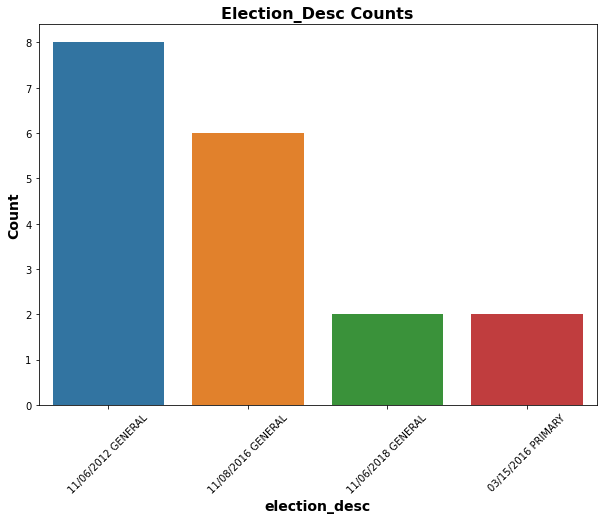

In [19]:
plot_count('election_desc', dup_ncid_elecs, rotation=45);

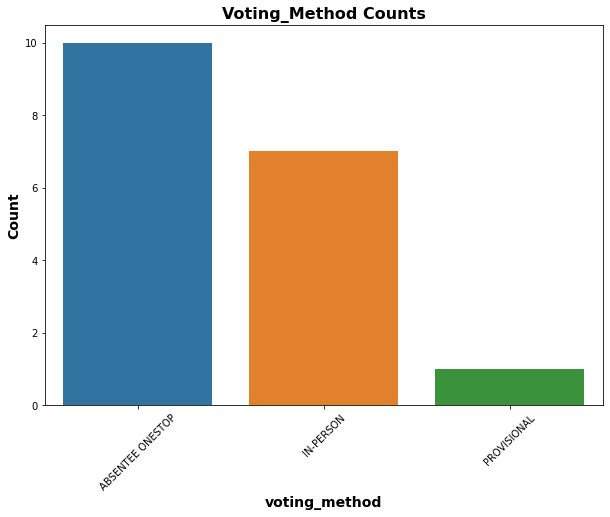

In [20]:
plot_count('voting_method', dup_ncid_elecs, rotation=45);

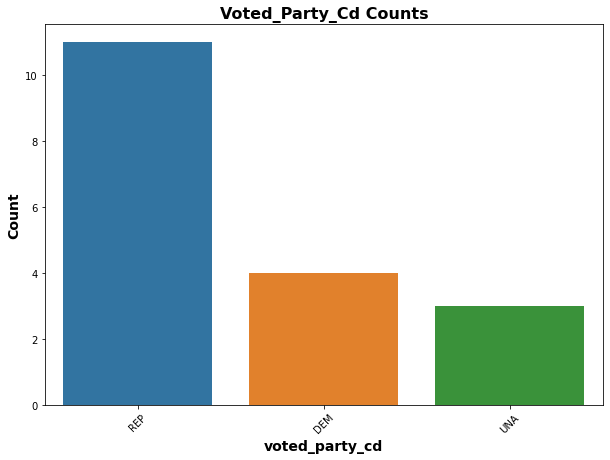

In [21]:
plot_count('voted_party_cd', dup_ncid_elecs, rotation=45);

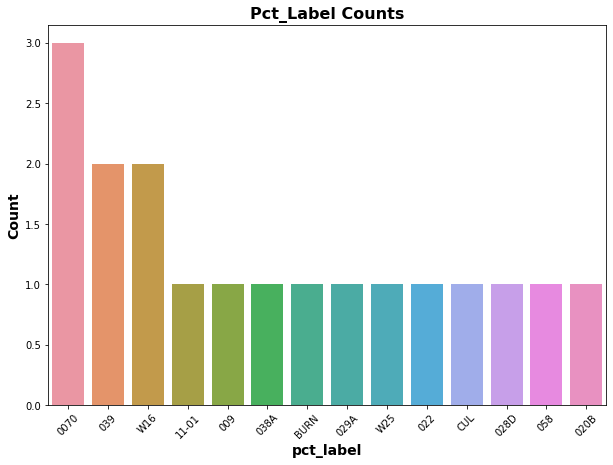

In [22]:
plot_count('pct_label', dup_ncid_elecs, rotation=45);

## Explore Voter Registration Records

In [23]:
## Check number of unique individuals represented in voter reg records
uc_vreg['ncid'].nunique()

183969

In [24]:
## Check voter status information -- Should any categories be removed??
uc_vreg['voter_status_desc'].value_counts()

ACTIVE       154115
INACTIVE      15014
REMOVED       13363
DENIED         1354
TEMPORARY       123
Name: voter_status_desc, dtype: int64

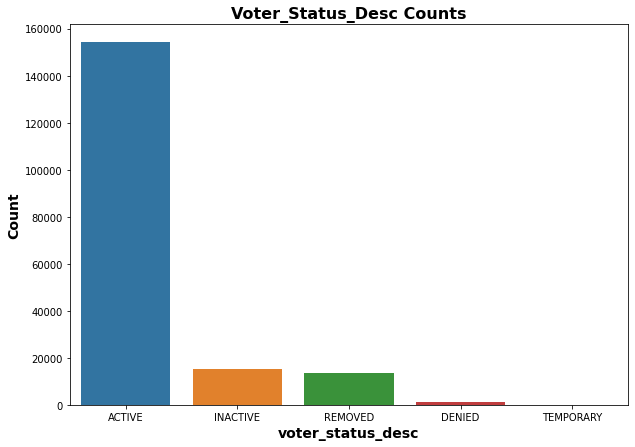

In [25]:
plot_count('voter_status_desc', uc_vreg);

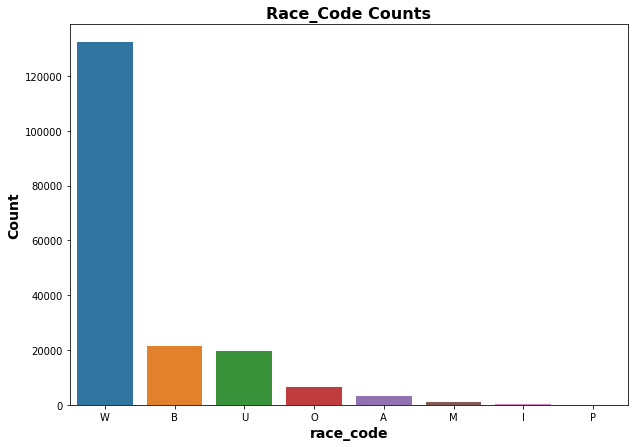

In [26]:
plot_count('race_code', uc_vreg);

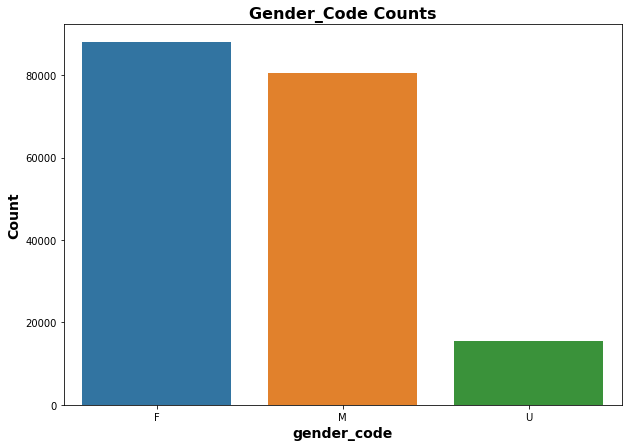

In [27]:
plot_count('gender_code', uc_vreg);

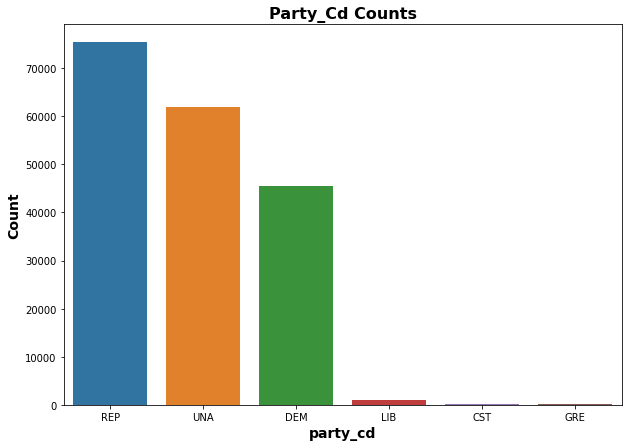

In [28]:
plot_count('party_cd', uc_vreg); # registered party

In [29]:
uc_vreg['birth_year'].min()

1753

In [30]:
uc_vreg['birth_year'].sort_values()[:10]

75716     1753
1478      1907
175606    1910
153703    1912
65602     1912
156942    1912
70052     1912
145062    1913
9705      1913
111055    1913
Name: birth_year, dtype: int64

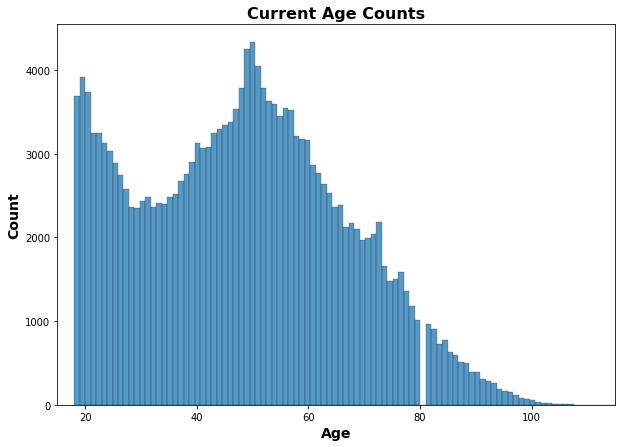

In [31]:
## Plot distribution of current age as of EOY 2020 
  ## Note that the birth_age column in uc_vreg is specific to the date that
    ## individual registered to vote, so not reflective of current age
plt.figure(figsize=(10,7))
ax = sns.histplot(uc_vreg['birth_age'])
ax.set_title('Current Age Counts', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# There is one voter listed as having been born in 1753 that throws off x axis
ax.set_xlim(15,115);

### Active Voters

In [32]:
active_voters = uc_vreg.groupby('voter_status_desc').get_group('ACTIVE')
print(len(active_voters))
active_voters.head()

154115


county_id county_desc  voter_reg_num status_cd voter_status_desc reason_cd  \
0         90       UNION         346446         A            ACTIVE        AV   
1         90       UNION         348004         A            ACTIVE        AV   
2         90       UNION         281016         A            ACTIVE        AV   
3         90       UNION         288489         A            ACTIVE        AV   
4         90       UNION         279308         A            ACTIVE        AV   

  voter_status_reason_desc absent_ind name_prefx_cd last_name first_name  \
0                 VERIFIED                             AALAEI       ARIO   
1                 VERIFIED                             AALAEI    KAVITHA   
2                 VERIFIED                            AALBORG     ALEXIS   
3                 VERIFIED                            AALBORG      BRYAN   
4                 VERIFIED                            AALBORG     SHARON   

    middle_name name_suffix_lbl         res_street_address res_city_desc  \
0           NaN             NaN   4009  MILLBRIDGE PKWY           WAXHAW   
1           NaN             NaN   4009  MILLBRIDGE PKWY           WAXHAW   
2         LEANN             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   
3           LEE             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   
4  SCHLEENBAKER             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   

  state_cd  zip_code             mail_addr1 mail_addr2 mail_addr3 mail_addr4  \
0       NC   28173.0   4009 MILLBRIDGE PKWY        NaN        NaN        NaN   
1       NC   28173.0   4009 MILLBRIDGE PKWY        NaN        NaN        NaN   
2       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   
3       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   
4       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   

      mail_city mail_state mail_zipcode  full_phone_number race_code  \
0        WAXHAW         NC        28173                NaN         W   
1        WAXHAW         NC        28173                NaN         A   
2  INDIAN TRAIL         NC        28079                NaN         W   
3  INDIAN TRAIL         NC        28079                NaN         W   
4  INDIAN TRAIL         NC        28079                NaN         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      DEM           F         46          OC           Y   
2          NL      UNA           F         26          IA           Y   
3          UN      UNA           M         62          OK           Y   
4          NL      REP           F         62          PA           Y   

   registr_dt precinct_abbrv precinct_desc  municipality_abbrv  \
0  04/25/2019           020A          020A                 5.0   
1  06/24/2019           020A          020A                 5.0   
2  11/04/2013           029A          029A                 6.0   
3  09/17/2014           029A          029A                 6.0   
4  07/24/2013           029A          029A                 6.0   

  municipality_desc  ward_abbrv  ward_desc  cong_dist_abbrv super_court_abbrv  \
0            WAXHAW         NaN        NaN              9.0               20B   
1            WAXHAW         NaN        NaN              9.0               20B   
2      INDIAN TRAIL         NaN        NaN              9.0               20B   
3      INDIAN TRAIL         NaN        NaN              9.0               20B   
4      INDIAN TRAIL         NaN        NaN              9.0               20B   

  judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  county_commiss_abbrv  \
0              20C             35.0            68.0                   NaN   
1              20C             35.0            68.0                   NaN   
2              20C             35.0            68.0                   NaN   
3              20C             35.0            68.0      

In [33]:
active_voters['voter_status_reason_desc'].value_counts()

VERIFIED                               148992
LEGACY DATA                              2329
UNVERIFIED                               1788
UNVERIFIED NEW                            894
VERIFICATION PENDING                       35
CONFIRMATION PENDING                       30
CONFIRMATION NOT RETURNED                  26
CONFIRMATION RETURNED UNDELIVERABLE        20
ARMED FORCES                                1
Name: voter_status_reason_desc, dtype: int64

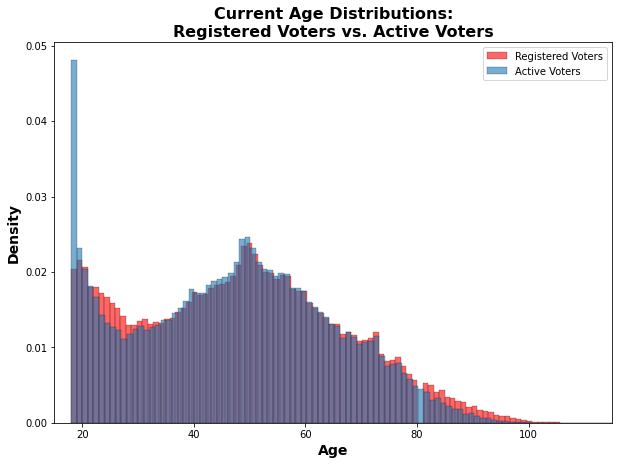

In [34]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  active_voters, 'Active Voters');

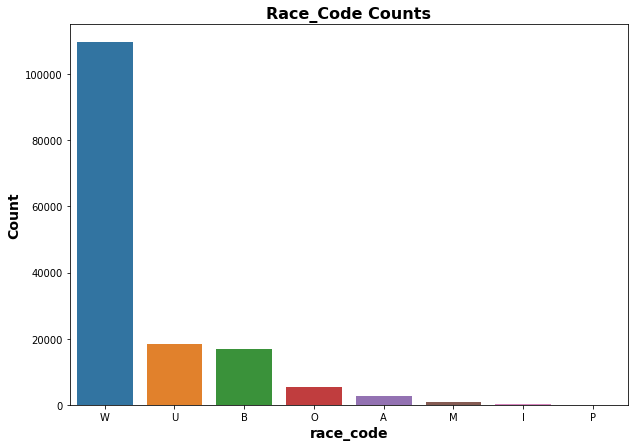

In [35]:
plot_count('race_code', active_voters);

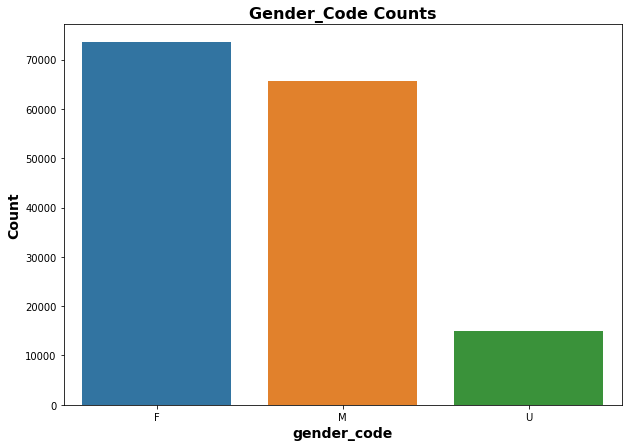

In [36]:
plot_count('gender_code', active_voters);

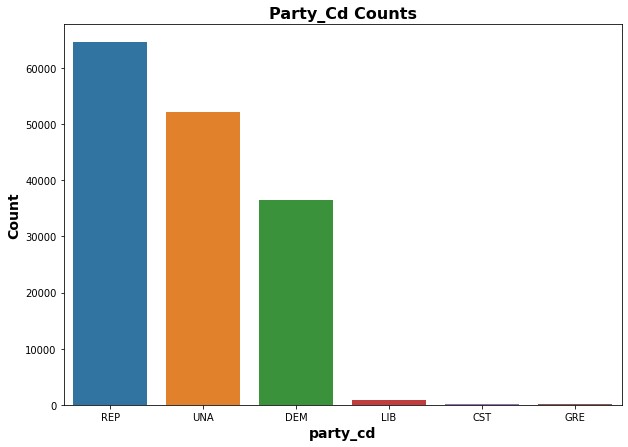

In [37]:
plot_count('party_cd', active_voters);

### Denied Voters

In [38]:
denied_voters = uc_vreg.groupby('voter_status_desc').get_group('DENIED')
print(len(denied_voters))
denied_voters.head()

1354


county_id county_desc  voter_reg_num status_cd voter_status_desc  \
124         90       UNION         265544         D            DENIED   
329         90       UNION         365813         D            DENIED   
527         90       UNION         241596         D            DENIED   
580         90       UNION         199199         D            DENIED   
594         90       UNION         318111         D            DENIED   

    reason_cd             voter_status_reason_desc absent_ind name_prefx_cd  \
124        DU  VERIFICATION RETURNED UNDELIVERABLE                            
329        DU  VERIFICATION RETURNED UNDELIVERABLE                            
527        DU  VERIFICATION RETURNED UNDELIVERABLE                            
580        DU  VERIFICATION RETURNED UNDELIVERABLE                            
594        DU  VERIFICATION RETURNED UNDELIVERABLE                            

       last_name first_name middle_name name_suffix_lbl  \
124  ABDELRAHMAN     SAMIRA        IMAD             NaN   
329      ABSHERE  CHRISTINE         MAE             NaN   
527        ADAMO     ANGELO         NaN             NaN   
580        ADAMS     CHERYL      YVONNE             NaN   
594        ADAMS    DANIELE   ELIZABETH             NaN   

           res_street_address res_city_desc state_cd  zip_code  \
124  1007  MILLS HARRIS RD       MARSHVILLE       NC   28103.0   
329  1516  MILLS HARRIS RD          WINGATE       NC   28174.0   
527      1003  SANDBOX CIR     INDIAN TRAIL       NC   28079.0   
580         4909 E HWY 74           WINGATE       NC   28174.0   
594   3300  BROOKSTONE TRL     INDIAN TRAIL       NC   28079.0   

               mail_addr1 mail_addr2 mail_addr3 mail_addr4     mail_city  \
124  1007 MILLS HARRIS RD        NaN        NaN        NaN    MARSHVILLE   
329  1516 MILLS HARRIS RD        NaN        NaN        NaN       WINGATE   
527      1003 SANDBOX CIR        NaN        NaN        NaN  INDIAN TRAIL   
580         4909 E HWY 74        NaN        NaN        NaN       WINGATE   
594   3300 BROOKSTONE TRL        NaN        NaN        NaN  INDIAN TRAIL   

    mail_state mail_zipcode  full_phone_number race_code ethnic_code party_cd  \
124         NC        28103                NaN         B          NL      UNA   
329         NC        28174                NaN         U          UN      REP   
527         NC        28079                NaN         W          NL      UNA   
580         NC        28174                NaN         W          NL      UNA   
594         NC        28079                NaN         W          NL      UNA   

    gender_code  birth_age birth_state drivers_lic  registr_dt precinct_abbrv  \
124           F         28          NC           Y  07/27/2012            NaN   
329           U         59         NaN           Y  08/06/2020            NaN   
527           M         76          OC           Y  05/01/2009            NaN   
580           F         49          TX           Y  08/03/2005            NaN   
594           F         31          OC           Y  10/29/2016            NaN   

    precinct_desc  municipality_abbrv municipality_desc  ward_abbrv  \
124           NaN                 NaN               NaN         NaN   
329           NaN                 NaN               NaN         NaN   
527           NaN                 NaN               NaN         NaN   
580           NaN                 NaN               NaN         NaN   
594           NaN                 NaN               NaN         NaN   

     ward_desc  cong_dist_abbrv super_court_abbrv judic_dist_abbrv  \
124        NaN              NaN               NaN              NaN   
329        NaN              NaN               NaN              NaN   
527        NaN              NaN               NaN              NaN   
580        NaN              NaN               NaN              NaN   
594        NaN              NaN               NaN              NaN   

     nc_senate_abbrv  nc_house_abbrv  county_commiss_abbrv  

In [39]:
denied_voters['voter_status_reason_desc'].value_counts()

VERIFICATION RETURNED UNDELIVERABLE    1354
Name: voter_status_reason_desc, dtype: int64

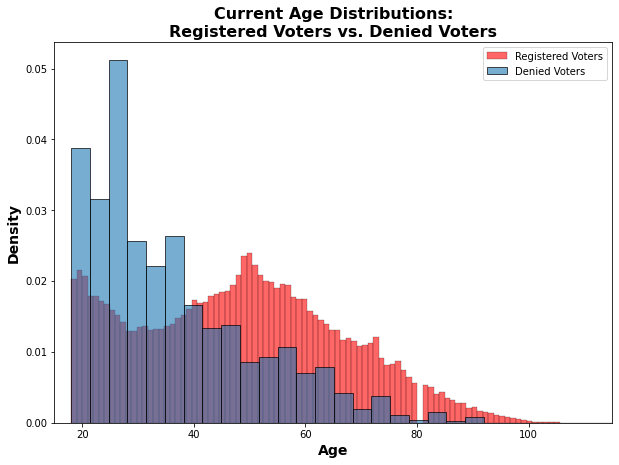

In [40]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  denied_voters, 'Denied Voters');

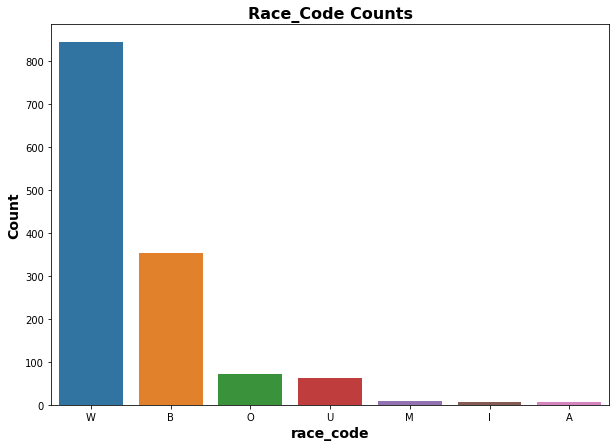

In [41]:
plot_count('race_code', denied_voters);

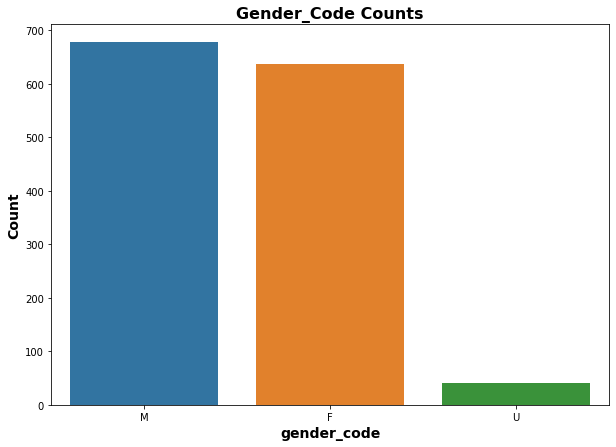

In [42]:
plot_count('gender_code', denied_voters);

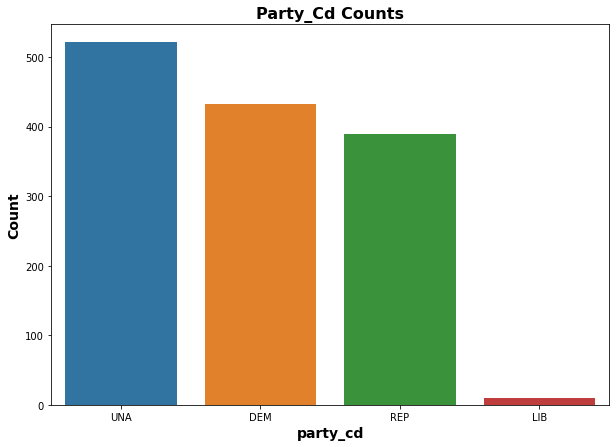

In [43]:
plot_count('party_cd', denied_voters);

### Inactive Voters

In [44]:
inactive_voters = uc_vreg.groupby('voter_status_desc').get_group('INACTIVE')
print(len(inactive_voters))
inactive_voters.head()

15014


county_id county_desc  voter_reg_num status_cd voter_status_desc  \
21         90       UNION         283607         I          INACTIVE   
35         90       UNION         304093         I          INACTIVE   
45         90       UNION         200444         I          INACTIVE   
87         90       UNION         240783         I          INACTIVE   
90         90       UNION         236007         I          INACTIVE   

   reason_cd   voter_status_reason_desc absent_ind name_prefx_cd  \
21        IN  CONFIRMATION NOT RETURNED                            
35        IN  CONFIRMATION NOT RETURNED                            
45        IN  CONFIRMATION NOT RETURNED                            
87        IN  CONFIRMATION NOT RETURNED                            
90        IN  CONFIRMATION NOT RETURNED                            

         last_name first_name middle_name name_suffix_lbl  \
21            ABAR    KRISTEN      ELAINE             NaN   
35  ABARCA-NICOLAS       JOSE     ALBERTO             NaN   
45           ABBAS       OMAR     MOHAMED             NaN   
87          ABBOTT       MARY         SUE             NaN   
90          ABBOTT       NEIL         NaN             NaN   

               res_street_address res_city_desc state_cd  zip_code  \
21             5523  CHERAW RD       MARSHVILLE       NC   28103.0   
35               616  JONES ST           MONROE       NC   28110.0   
45  2206  HONEYCUTT SIMPSON RD           MONROE       NC   28110.0   
87              4122  EUTAW DR           WAXHAW       NC   28173.0   
90           5127  CRUZ BAY DR           MONROE       NC   28110.0   

                   mail_addr1 mail_addr2 mail_addr3 mail_addr4   mail_city  \
21             5523 CHERAW RD        NaN        NaN        NaN  MARSHVILLE   
35               616 JONES ST        NaN        NaN        NaN      MONROE   
45  2206 HONEYCUTT SIMPSON RD        NaN        NaN        NaN      MONROE   
87              4122 EUTAW DR        NaN        NaN        NaN      WAXHAW   
90           5127 CRUZ BAY DR        NaN        NaN        NaN      MONROE   

   mail_state mail_zipcode  full_phone_number race_code ethnic_code party_cd  \
21         NC        28103                NaN         W          NL      DEM   
35         NC        28110                NaN         O          NL      UNA   
45         NC        28110                NaN         O          UN      UNA   
87         NC        28173                NaN         W          NL      UNA   
90         NC        28110                NaN         W          UN      UNA   

   gender_code  birth_age birth_state drivers_lic  registr_dt precinct_abbrv  \
21           F         24          NC           Y  02/17/2014            026   
35           M         22          NC           Y  04/26/2016            004   
45           M         33          NJ           Y  10/03/2005            013   
87           F         40          WV           Y  03/04/2009           020A   
90           U         41         NaN           Y  10/10/2008            031   

   precinct_desc  municipality_abbrv municipality_desc  ward_abbrv  ward_desc  \
21           026                 NaN               NaN         NaN        NaN   
35           004                 2.0            MONROE         NaN        NaN   
45           013                98.0        UNIONVILLE         NaN        NaN   
87          020A                 5.0            WAXHAW         NaN        NaN   
90           031                 NaN               NaN         NaN        NaN   

    cong_dist_abbrv super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  \
21              9.0               20B              20C             35.0   
35              9.0               20B              20B             35.0   
45              9.0               20B              20B             35.0   
87              9.0               20B              20C             35.0   
90              9.0               20B              20C             35.0   

    n

In [45]:
inactive_voters['voter_status_reason_desc'].value_counts()

CONFIRMATION NOT RETURNED              9485
CONFIRMATION RETURNED UNDELIVERABLE    5528
ADMINISTRATIVE                            1
Name: voter_status_reason_desc, dtype: int64

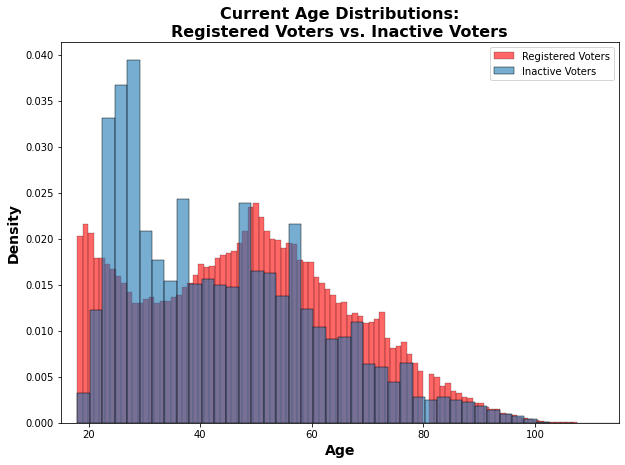

In [46]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  inactive_voters, 'Inactive Voters');

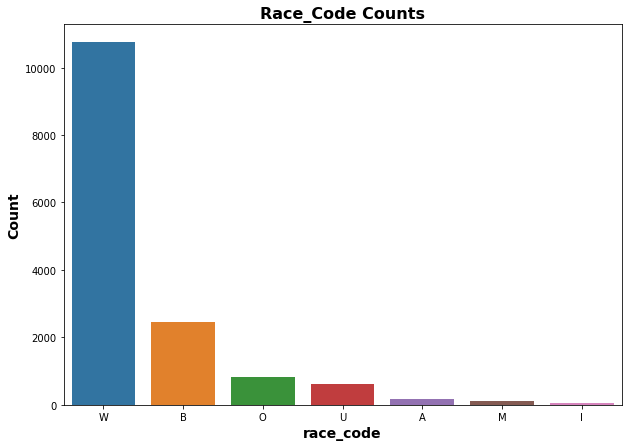

In [47]:
plot_count('race_code', inactive_voters);

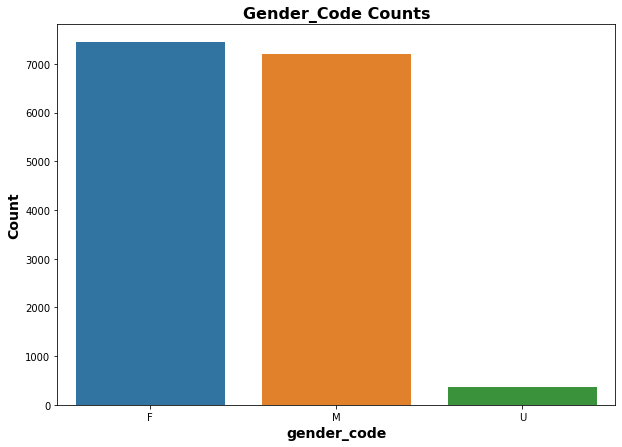

In [48]:
plot_count('gender_code', inactive_voters);

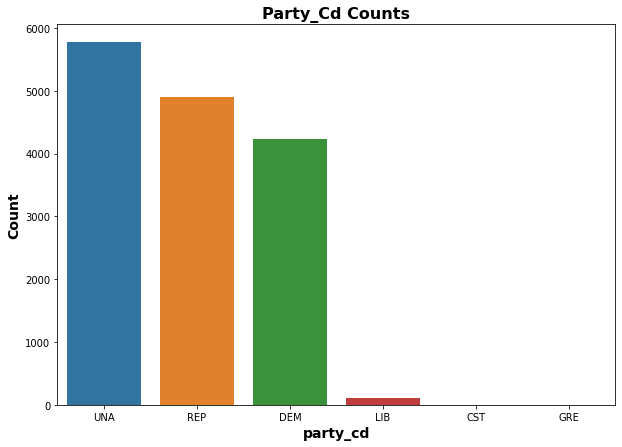

In [49]:
plot_count('party_cd', inactive_voters);

### Removed Voters

In [50]:
removed_voters = uc_vreg.groupby('voter_status_desc').get_group('REMOVED')
print(len(removed_voters))
removed_voters.head()

13363


county_id county_desc  voter_reg_num status_cd voter_status_desc  \
20         90       UNION         259695         R           REMOVED   
62         90       UNION         243470         R           REMOVED   
68         90       UNION         190348         R           REMOVED   
73         90       UNION         157042         R           REMOVED   
78         90       UNION         262940         R           REMOVED   

   reason_cd                           voter_status_reason_desc absent_ind  \
20        RM  REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...              
62        RL                                  MOVED FROM COUNTY              
68        RS                                   MOVED FROM STATE              
73        RD                                           DECEASED              
78        RM  REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...              

   name_prefx_cd last_name first_name middle_name name_suffix_lbl  \
20                    ABAR      JAMES   FREDERICK                   
62                   ABBEN     LAURIN     DOROTHY                   
68                  ABBOTT       ALAN      WALTER                   
73                  ABBOTT    CHARLES         NaN                   
78                  ABBOTT     HARLEY    CHEYENNE                   

   res_street_address res_city_desc state_cd  zip_code mail_addr1 mail_addr2  \
20            REMOVED           NaN      NaN       NaN                         
62            REMOVED           NaN      NaN       NaN                         
68            REMOVED           NaN      NaN       NaN                         
73            REMOVED           NaN      NaN       NaN                         
78            REMOVED           NaN      NaN       NaN                         

   mail_addr3 mail_addr4 mail_city mail_state mail_zipcode  full_phone_number  \
20                                                                        NaN   
62                                                                        NaN   
68                                                                        NaN   
73                                                                        NaN   
78                                                                        NaN   

   race_code ethnic_code party_cd gender_code  birth_age birth_state  \
20         W          NL      REP           M         49          MI   
62         W          NL      REP           F         29          FL   
68         W          NL      REP           M         52          NY   
73         B          NL      DEM           M         61         NaN   
78         W          NL      DEM           F         26          WV   

   drivers_lic  registr_dt precinct_abbrv precinct_desc  municipality_abbrv  \
20           Y  02/09/2012            NaN           NaN                 NaN   
62           N  09/01/2009            NaN           NaN                 NaN   
68           Y  09/15/2004            NaN           NaN                 NaN   
73           Y  06/12/2000            NaN           NaN                 NaN   
78           Y  07/10/2012            NaN           NaN                 NaN   

   municipality_desc  ward_abbrv  ward_desc  cong_dist_abbrv  \
20               NaN         NaN        NaN              NaN   
62               NaN         NaN        NaN              NaN   
68               NaN         NaN        NaN              NaN   
73               NaN         NaN        NaN              NaN   
78               NaN         NaN        NaN              NaN   

   super_court_abbrv judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  \
20               NaN              NaN              NaN             NaN   
62               NaN              NaN              NaN             NaN   
68               NaN              NaN              NaN             NaN   
73               NaN              NaN              NaN             NaN   
78               NaN              NaN              NaN  

In [51]:
removed_voters['voter_status_reason_desc'].value_counts()

DECEASED                                                    6076
MOVED FROM STATE                                            3720
REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACTIVE STATUS    1581
MOVED FROM COUNTY                                           1333
MOVED WITHIN STATE                                           163
FELONY SENTENCE COMPLETED                                    154
REQUEST FROM VOTER                                           119
FELONY CONVICTION                                            114
TEMPORARY REGISTRANT                                          73
DUPLICATE                                                     25
ADMINISTRATIVE                                                 5
Name: voter_status_reason_desc, dtype: int64

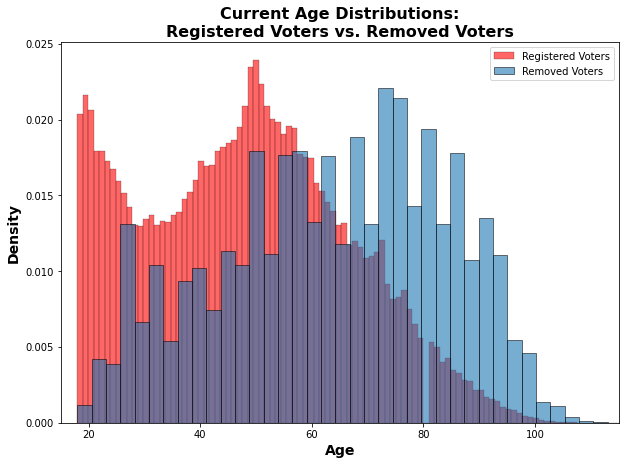

In [52]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  removed_voters, 'Removed Voters');

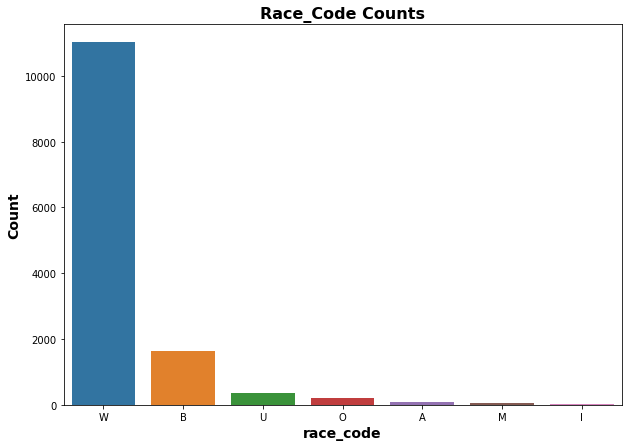

In [53]:
plot_count('race_code', removed_voters);

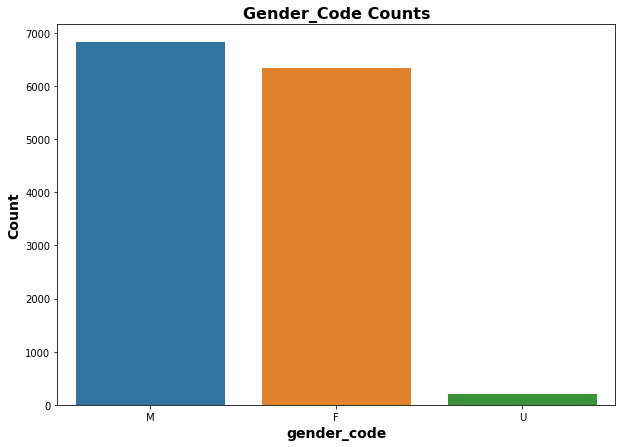

In [54]:
plot_count('gender_code', removed_voters);

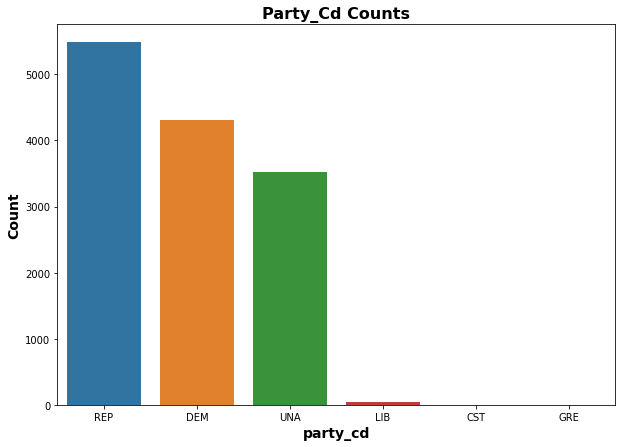

In [55]:
plot_count('party_cd', removed_voters);

## Merge Voter Registration Data with Voter History Data

In [58]:
## Merge voter registration information onto records of voter history based 
  ## on unique ncid
    
## Use right join so we're only including ncid's for which their is
  ## registration and demographic information, including for those 
    ## people who are registered, but have never voted
all_uc_voters = uc_vhis.merge(uc_vreg.drop(columns=['county_id', 'county_desc',
                                                'voter_reg_num'], axis=1),
                                       how='right', on='ncid')
# inspect new dataframe
display(all_uc_voters.head())
all_uc_voters.tail()

county_id county_desc  voter_reg_num election_lbl  \
0       90.0       UNION       346446.0   11/03/2020   
1       90.0       UNION       348004.0   11/03/2020   
2        NaN         NaN            NaN          NaN   
3       90.0       UNION       288489.0   11/08/2011   
4       90.0       UNION       288489.0   11/06/2012   

                  election_desc     voting_method voted_party_cd  \
0            11/03/2020 GENERAL  ABSENTEE ONESTOP            UNA   
1            11/03/2020 GENERAL  ABSENTEE ONESTOP            DEM   
2                           NaN               NaN            NaN   
3  11/08/2011 MUNICIPAL GENERAL         IN-PERSON            UNA   
4            11/06/2012 GENERAL  ABSENTEE ONESTOP            UNA   

  voted_party_desc pct_label pct_description      ncid  voted_county_id  \
0     UNAFFILIATED      020A            020A  EF230133             90.0   
1       DEMOCRATIC      020A            020A  EF231096             90.0   
2              NaN       NaN             NaN  AL261840              NaN   
3     UNAFFILIATED      26.1            26.1  AL178177             11.0   
4     UNAFFILIATED      26.1            26.1  AL178177             11.0   

  voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
0             UNION      020A            020A         A            ACTIVE   
1             UNION      020A            020A         A            ACTIVE   
2               NaN       NaN             NaN         A            ACTIVE   
3          BUNCOMBE      26.1            26.1         A            ACTIVE   
4          BUNCOMBE      26.1            26.1         A            ACTIVE   

  reason_cd voter_status_reason_desc absent_ind name_prefx_cd last_name  \
0        AV                 VERIFIED                             AALAEI   
1        AV                 VERIFIED                             AALAEI   
2        AV                 VERIFIED                            AALBORG   
3        AV                 VERIFIED                            AALBORG   
4        AV                 VERIFIED                            AALBORG   

  first_name middle_name name_suffix_lbl         res_street_address  \
0       ARIO         NaN             NaN   4009  MILLBRIDGE PKWY      
1    KAVITHA         NaN             NaN   4009  MILLBRIDGE PKWY      
2     ALEXIS       LEANN             NaN  1001  STEVENS PRIDE CT      
3      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      
4      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      

  res_city_desc state_cd  zip_code             mail_addr1 mail_addr2  \
0        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
1        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
2  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
3  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
4  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   

  mail_addr3 mail_addr4     mail_city mail_state mail_zipcode  \
0        NaN        NaN        WAXHAW         NC        28173   
1        NaN        NaN        WAXHAW         NC        28173   
2        NaN        NaN  INDIAN TRAIL         NC        28079   
3        NaN        NaN  INDIAN TRAIL         NC        28079   
4        NaN        NaN  INDIAN TRAIL         NC        28079   

   full_phone_number race_code ethnic_code party_cd gender_code  birth_age  \
0                NaN         W          NL      UNA           M         46   
1                NaN         A          NL      DEM           F         46   
2                NaN         W          NL      UNA           F         26   
3                NaN         W          UN      UNA           M         62   
4                NaN         W          UN      UNA           M         62   

  birth_state drivers_lic  registr_dt precinct_abbrv precinct_desc  \
0          OC           Y  04/25/2019           020A          020A   
1          OC           Y  06/24

county_id county_desc  voter_reg_num election_lbl       election_desc  \
825812       90.0       UNION       243464.0   11/06/2018  11/06/2018 GENERAL   
825813       90.0       UNION       243464.0   11/03/2020  11/03/2020 GENERAL   
825814       90.0       UNION       243464.0   05/08/2018  05/08/2018 PRIMARY   
825815       90.0       UNION       243464.0   09/10/2019  09/10/2019 GENERAL   
825816        NaN         NaN            NaN          NaN                 NaN   

           voting_method voted_party_cd voted_party_desc pct_label  \
825812  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825813  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825814  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825815  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825816               NaN            NaN              NaN       NaN   

       pct_description      ncid  voted_county_id voted_county_desc vtd_label  \
825812             025  EF157599             90.0             UNION       025   
825813             025  EF157599             90.0             UNION       025   
825814             025  EF157599             90.0             UNION       025   
825815             025  EF157599             90.0             UNION       025   
825816             NaN  EF219265              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
825812             025         A            ACTIVE        AV   
825813             025         A            ACTIVE        AV   
825814             025         A            ACTIVE        AV   
825815             025         A            ACTIVE        AV   
825816             NaN         I          INACTIVE        IU   

                   voter_status_reason_desc absent_ind name_prefx_cd  \
825812                             VERIFIED                            
825813                             VERIFIED                            
825814                             VERIFIED                            
825815                             VERIFIED                            
825816  CONFIRMATION RETURNED UNDELIVERABLE                            

       last_name first_name middle_name name_suffix_lbl  \
825812    ZYNSKY      JAMES      ROBERT             NaN   
825813    ZYNSKY      JAMES      ROBERT             NaN   
825814    ZYNSKY      JAMES      ROBERT             NaN   
825815    ZYNSKY      JAMES      ROBERT             NaN   
825816   ZYWICKI   JENNIFER         ANN             NaN   

           res_street_address res_city_desc state_cd  zip_code  \
825812     2905  MEDLIN RD           MONROE       NC   28112.0   
825813     2905  MEDLIN RD           MONROE       NC   28112.0   
825814     2905  MEDLIN RD           MONROE       NC   28112.0   
825815     2905  MEDLIN RD           MONROE       NC   28112.0   
825816  5719  PARKSTONE DR         MATTHEWS       NC   28104.0   

               mail_addr1 mail_addr2 mail_addr3 mail_addr4 mail_city  \
825812     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825813     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825814     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825815     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825816  5719 PARKSTONE DR        NaN        NaN        NaN  MATTHEWS   

       mail_state mail_zipcode  full_phone_number race_code ethnic_code  \
825812         NC        28112                NaN         W          NL   
825813         NC        28112                NaN         W          NL   
825814         NC        28112                NaN         W          NL   
825815         NC        28112                NaN         W          NL   
825816         NC        28104                NaN         W          NL   

       party_cd gender_code  birth_age birth_state drivers_lic  registr_dt  \
825812      DEM           M         68          MA           Y  08/28/2009   
825

## Drop 'Removed' and 'Denied' Voters - Further Exploration

In [59]:
## Drop voters who have been removed or had their registration denied
uc_voters = all_uc_voters.loc[all_uc_voters['voter_status_desc'] != 'REMOVED']
uc_voters = uc_voters.loc[uc_voters['voter_status_desc'] != 'DENIED']
# uc_voters.info()

In [60]:
## Check remaining number of unique individuals represented in the data
uc_voters['ncid'].nunique()

169252

In [61]:
## Find record(s) with the most missing information
print(uc_voters.isna().mean(axis=1).max())
uc_voters.loc[uc_voters.isna().mean(axis=1).idxmax()]
# Max amount of missing values per row = 50%
# Example below is for an individual who has no voting history

0.5


county_id                                     NaN
county_desc                                   NaN
voter_reg_num                                 NaN
election_lbl                                  NaN
election_desc                                 NaN
voting_method                                 NaN
voted_party_cd                                NaN
voted_party_desc                              NaN
pct_label                                     NaN
pct_description                               NaN
ncid                                     EF229843
voted_county_id                               NaN
voted_county_desc                             NaN
vtd_label                                     NaN
vtd_description                               NaN
status_cd                                       A
voter_status_desc                          ACTIVE
reason_cd                                      AV
voter_status_reason_desc                 VERIFIED
absent_ind                                       


In [62]:
## The majority of records have at least 2/3 of the information
uc_voters.isna().mean(axis=1).value_counts().sort_index(ascending=False)
## No records are perfectly complete due to several unused columns

0.500000       104
0.487805      1023
0.475610      4126
0.463415       200
0.451220       412
0.439024      2726
0.426829      8993
0.414634       480
0.402439         7
0.390244         3
0.378049         1
0.353659         4
0.341463        31
0.329268      3825
0.317073     67947
0.304878    159146
0.292683      9134
0.280488     10719
0.268293    144012
0.256098    346741
0.243902     19716
0.231707      4012
0.219512      1706
0.207317       110
dtype: int64

In [63]:
## Check the number of records corresponding to the top 15 elections
elec_counts_df = uc_voters['election_desc'].value_counts().to_frame()
elec_counts_df.iloc[:15]

election_desc
11/03/2020 GENERAL                       131416
11/08/2016 GENERAL                       102352
11/06/2012 GENERAL                        86577
11/06/2018 GENERAL                        86162
09/10/2019 GENERAL                        59172
11/04/2014 GENERAL                        54937
03/15/2016 PRIMARY                        44139
03/03/2020 PRIMARY                        43285
05/08/2012 PRIMARY                        36411
05/08/2018 PRIMARY                        17575
05/06/2014 PRIMARY                        14227
05/14/2019 PRIMARY                        12509
11/05/2019 MUNICIPAL                      12433
06/07/2016 CONGRESSIONAL PRIMARY          11659
11/07/2017 MUNICIPAL                      10749

## Engineer Features for Grouping/ Database Manipulation

In [64]:
## Create a new column specifying the election category based on the
  ## election description col
uc_voters.insert(loc=5, column='election_cat', 
                 value=uc_voters['election_desc'].str.split(n=1,
                                                            expand=True)[1])
# If the category was general or primary, leave as is, otherwise 'other'
uc_voters['election_cat'] = np.where(uc_voters['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     uc_voters['election_cat'], 'other')

In [65]:
## Recast election_lbl as datetime and create a new col for just the year
uc_voters['election_lbl'] = pd.to_datetime(uc_voters['election_lbl'])
uc_voters.insert(loc=5, column='election_yr',
                 value=uc_voters['election_lbl'].dt.year)

In [66]:
## Create a new binary variable indicating if it was a major election
uc_voters.insert(loc=7, column='major_elec',
                 value=np.where(((uc_voters['election_yr']%2 == 0) & 
                                 (uc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

## Create a new binary variable indicating if it was a presidential election
uc_voters.insert(loc=8, column='presid_elec',
                 value=np.where(((uc_voters['election_yr']%4 == 0) & 
                                 (uc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

In [67]:
## Group original vote methods into more general categories in a new variable
# Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

# Apply the map to create new vote_method_cat column
uc_voters.insert(loc=10, column='vote_method_cat',
                 value=uc_voters['voting_method'].map(vote_method_map))

In [68]:
## Null values in the election_desc col indicate individuals that are 
  ## registered to vote, but have not voted in a recent major election.
    ## Thus, election_cat, major_elec, and presid_elec 
    ## are irrelevant for these records
# Fill irrelevant fields with null values
uc_voters.loc[uc_voters['election_desc'].isna(),
              ['election_cat', 'major_elec',
               'presid_elec']] = np.nan

# Fill with NaN with 'None' in election_desc col to preserve info for
  # registered voters without a voting history when merging df's based on 
    # ncid and election_desc below
uc_voters['election_desc'].fillna('None', inplace=True)

# Inspect updated dataframe
uc_voters.head()

county_id county_desc  voter_reg_num election_lbl  \
0       90.0       UNION       346446.0   2020-11-03   
1       90.0       UNION       348004.0   2020-11-03   
2        NaN         NaN            NaN          NaT   
3       90.0       UNION       288489.0   2011-11-08   
4       90.0       UNION       288489.0   2012-11-06   

                  election_desc  election_yr election_cat  major_elec  \
0            11/03/2020 GENERAL       2020.0      GENERAL         1.0   
1            11/03/2020 GENERAL       2020.0      GENERAL         1.0   
2                          None          NaN          NaN         NaN   
3  11/08/2011 MUNICIPAL GENERAL       2011.0        other         0.0   
4            11/06/2012 GENERAL       2012.0      GENERAL         1.0   

   presid_elec     voting_method vote_method_cat voted_party_cd  \
0          1.0  ABSENTEE ONESTOP           Early            UNA   
1          1.0  ABSENTEE ONESTOP           Early            DEM   
2          NaN               NaN             NaN            NaN   
3          0.0         IN-PERSON    Election Day            UNA   
4          1.0  ABSENTEE ONESTOP           Early            UNA   

  voted_party_desc pct_label pct_description      ncid  voted_county_id  \
0     UNAFFILIATED      020A            020A  EF230133             90.0   
1       DEMOCRATIC      020A            020A  EF231096             90.0   
2              NaN       NaN             NaN  AL261840              NaN   
3     UNAFFILIATED      26.1            26.1  AL178177             11.0   
4     UNAFFILIATED      26.1            26.1  AL178177             11.0   

  voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
0             UNION      020A            020A         A            ACTIVE   
1             UNION      020A            020A         A            ACTIVE   
2               NaN       NaN             NaN         A            ACTIVE   
3          BUNCOMBE      26.1            26.1         A            ACTIVE   
4          BUNCOMBE      26.1            26.1         A            ACTIVE   

  reason_cd voter_status_reason_desc absent_ind name_prefx_cd last_name  \
0        AV                 VERIFIED                             AALAEI   
1        AV                 VERIFIED                             AALAEI   
2        AV                 VERIFIED                            AALBORG   
3        AV                 VERIFIED                            AALBORG   
4        AV                 VERIFIED                            AALBORG   

  first_name middle_name name_suffix_lbl         res_street_address  \
0       ARIO         NaN             NaN   4009  MILLBRIDGE PKWY      
1    KAVITHA         NaN             NaN   4009  MILLBRIDGE PKWY      
2     ALEXIS       LEANN             NaN  1001  STEVENS PRIDE CT      
3      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      
4      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      

  res_city_desc state_cd  zip_code             mail_addr1 mail_addr2  \
0        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
1        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
2  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
3  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
4  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   

  mail_addr3 mail_addr4     mail_city mail_state mail_zipcode  \
0        NaN        NaN        WAXHAW         NC        28173   
1        NaN        NaN        WAXHAW         NC        28173   
2        NaN        NaN  INDIAN TRAIL         NC        28079   
3        NaN        NaN  INDIAN TRAIL         NC        28079   
4        NaN        NaN  INDIAN TRAIL         NC        28079   

   full_phone_number race_code ethnic_code party_cd gender_code  birth_age  \
0                NaN         W          NL      UNA           M         46   
1                NaN         A          NL      DEM 

In [69]:
## Check number of unique individuals represented by the data
uc_voters['ncid'].nunique()

169252

In [70]:
## Store index of non-major and non-null election types
other_elec_idx = uc_voters.loc[uc_voters['election_cat']=='other'].index

## Create a df containing only major and null elections
major_elec_df = uc_voters.drop(index=other_elec_idx)

# Check number of unique individuals that voted in a recent major election, 
  # plus those with no voting history
print(major_elec_df['ncid'].nunique())

# 131 registered voters voted in a non-major election, but no major elections
uc_voters['ncid'].nunique() - major_elec_df['ncid'].nunique()

169121


131

## Merge DataFrames - Focus on Recent Major Elections

In [71]:
## Get list of unique ncids
uc_ncid_list = list(uc_voters['ncid'].unique())

## Get list of unique election descriptions
major_elections = list(uc_voters.groupby('major_elec').get_group(1)['election_desc'].unique())

## Add 'None' to the list to capture individuals that have not voted in any 
  ## recent major election when merging dataframes on ncid and election_desc
elec_desc_list = major_elections + ['None']
elec_desc_list

['11/03/2020 GENERAL',
 '11/06/2012 GENERAL',
 '05/08/2012 PRIMARY',
 '03/15/2016 PRIMARY',
 '11/06/2018 GENERAL',
 '11/08/2016 GENERAL',
 '11/04/2014 GENERAL',
 '03/03/2020 PRIMARY',
 '05/08/2018 PRIMARY',
 '05/06/2014 PRIMARY',
 'None']

In [72]:
## Create multiindex that lists every election for every registered voter
mltidx = pd.MultiIndex.from_tuples(
    [(ncid, elec) for ncid in uc_ncid_list for elec in elec_desc_list],
    names=['ncid', 'election_desc'])

## Use multiindex to create new dataframe
elecs_by_voter = pd.DataFrame(index=mltidx)

In [73]:
## Check length and inspect structure of new dataframe
print(len(elecs_by_voter))
elecs_by_voter.head(15)

1861772


Empty DataFrame
Columns: []
Index: [(EF230133, 11/03/2020 GENERAL), (EF230133, 11/06/2012 GENERAL), (EF230133, 05/08/2012 PRIMARY), (EF230133, 03/15/2016 PRIMARY), (EF230133, 11/06/2018 GENERAL), (EF230133, 11/08/2016 GENERAL), (EF230133, 11/04/2014 GENERAL), (EF230133, 03/03/2020 PRIMARY), (EF230133, 05/08/2018 PRIMARY), (EF230133, 05/06/2014 PRIMARY), (EF230133, None), (EF231096, 11/03/2020 GENERAL), (EF231096, 11/06/2012 GENERAL), (EF231096, 05/08/2012 PRIMARY), (EF231096, 03/15/2016 PRIMARY)]

In [74]:
## Merge voter histories using the created multiindex as the keys to join
  ## each ncid onto every election and 'None'
voter_elecs = elecs_by_voter.merge(uc_vhis, how='left',
                                   on=['ncid', 'election_desc'])
# Inspect new df
print(len(voter_elecs))
display(voter_elecs.head())
voter_elecs.tail()

1861781


ncid       election_desc  county_id county_desc  voter_reg_num  \
0  EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1  EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2  EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3  EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4  EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   

  election_lbl     voting_method voted_party_cd voted_party_desc pct_label  \
0   11/03/2020  ABSENTEE ONESTOP            UNA     UNAFFILIATED      020A   
1          NaN               NaN            NaN              NaN       NaN   
2          NaN               NaN            NaN              NaN       NaN   
3          NaN               NaN            NaN              NaN       NaN   
4          NaN               NaN            NaN              NaN       NaN   

  pct_description  voted_county_id voted_county_desc vtd_label vtd_description  
0            020A             90.0             UNION      020A            020A  
1             NaN              NaN               NaN       NaN             NaN  
2             NaN              NaN               NaN       NaN             NaN  
3             NaN              NaN               NaN       NaN             NaN  
4             NaN              NaN               NaN       NaN             NaN

ncid       election_desc  county_id county_desc  voter_reg_num  \
1861776  EF219265  11/04/2014 GENERAL        NaN         NaN            NaN   
1861777  EF219265  03/03/2020 PRIMARY        NaN         NaN            NaN   
1861778  EF219265  05/08/2018 PRIMARY        NaN         NaN            NaN   
1861779  EF219265  05/06/2014 PRIMARY        NaN         NaN            NaN   
1861780  EF219265                None        NaN         NaN            NaN   

        election_lbl voting_method voted_party_cd voted_party_desc pct_label  \
1861776          NaN           NaN            NaN              NaN       NaN   
1861777          NaN           NaN            NaN              NaN       NaN   
1861778          NaN           NaN            NaN              NaN       NaN   
1861779          NaN           NaN            NaN              NaN       NaN   
1861780          NaN           NaN            NaN              NaN       NaN   

        pct_description  voted_county_id voted_county_desc vtd_label  \
1861776             NaN              NaN               NaN       NaN   
1861777             NaN              NaN               NaN       NaN   
1861778             NaN              NaN               NaN       NaN   
1861779             NaN              NaN               NaN       NaN   
1861780             NaN              NaN               NaN       NaN   

        vtd_description  
1861776             NaN  
1861777             NaN  
1861778             NaN  
1861779             NaN  
1861780             NaN

In [75]:
## Check for duplicate rows
voter_elecs.duplicated().sum()

0

In [76]:
## Create a list of columns to drop when performing next merge to limit size
  ## of new dataframe
# List of columns that were mostly null for original merged df
mostly_null_cols = [col for col in all_uc_voters.columns if all_uc_voters[col].isna().mean() >= 0.9]

# List of columns that are filled with empty white space
empty_cols = [col for col in all_uc_voters.columns if all_uc_voters[col].unique()[0] == ' ']

# List of municipality and mailing address info columns 
  # (not very useful, a lot of NaN)
munic_cols = [col for col in all_uc_voters.columns if col.startswith('munic')]
mail_cols = [col for col in all_uc_voters.columns if col.startswith('mail')]

# Combine all lists into one list of columns to drop
cols_to_drop = mostly_null_cols + empty_cols + munic_cols + mail_cols

In [77]:
## Merge voter registration information onto the new df based on ncid
voter_elecs = voter_elecs.merge(uc_vreg.drop(columns=cols_to_drop+['county_id',
                                                      'county_desc',
                                                      'voter_reg_num'],
                                             axis=1),
                                how='left', on='ncid')
# Inspect resulting df
voter_elecs.head()

ncid       election_desc  county_id county_desc  voter_reg_num  \
0  EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1  EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2  EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3  EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4  EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   

  election_lbl     voting_method voted_party_cd voted_party_desc pct_label  \
0   11/03/2020  ABSENTEE ONESTOP            UNA     UNAFFILIATED      020A   
1          NaN               NaN            NaN              NaN       NaN   
2          NaN               NaN            NaN              NaN       NaN   
3          NaN               NaN            NaN              NaN       NaN   
4          NaN               NaN            NaN              NaN       NaN   

  pct_description  voted_county_id voted_county_desc vtd_label  \
0            020A             90.0             UNION      020A   
1             NaN              NaN               NaN       NaN   
2             NaN              NaN               NaN       NaN   
3             NaN              NaN               NaN       NaN   
4             NaN              NaN               NaN       NaN   

  vtd_description status_cd voter_status_desc reason_cd  \
0            020A         A            ACTIVE        AV   
1             NaN         A            ACTIVE        AV   
2             NaN         A            ACTIVE        AV   
3             NaN         A            ACTIVE        AV   
4             NaN         A            ACTIVE        AV   

  voter_status_reason_desc last_name first_name middle_name  \
0                 VERIFIED    AALAEI       ARIO         NaN   
1                 VERIFIED    AALAEI       ARIO         NaN   
2                 VERIFIED    AALAEI       ARIO         NaN   
3                 VERIFIED    AALAEI       ARIO         NaN   
4                 VERIFIED    AALAEI       ARIO         NaN   

         res_street_address res_city_desc state_cd  zip_code race_code  \
0  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
1  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
2  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
3  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
4  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      UNA           M         46          OC           Y   
2          NL      UNA           M         46          OC           Y   
3          NL      UNA           M         46          OC           Y   
4          NL      UNA           M         46          OC           Y   

   registr_dt precinct_abbrv precinct_desc  cong_dist_abbrv super_court_abbrv  \
0  04/25/2019           020A          020A              9.0               20B   
1  04/25/2019           020A          020A              9.0               20B   
2  04/25/2019           020A          020A              9.0               20B   
3  04/25/2019           020A          020A              9.0               20B   
4  04/25/2019           020A          020A              9.0               20B   

  judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  \
0              20C             35.0            68.0                2.0   
1              20C             35.0            68.0                2.0   
2              20C             35.0            68.0                2.0   
3              20C             35.0            68.0                2.0   
4              20C             35.0            68.0                2.0   

  school_dist_desc  dist_1_abbrv         dist_1_desc confidential_ind  \
0        SCHOOL #2          30.0  30TH PROSECUTORIAL                N   
1     

# Scrub and Explore (Part II)

## Drop Duplicate and Obviously Incorrect Records

In [78]:
## Check for duplicate identical rows
voter_elecs.duplicated().sum()

0

In [79]:
## Check length of new df
len(voter_elecs)

1861781

In [80]:
## Check the intended length of the new df if every unique ncid
  ## appears only once for each election description
voter_elecs['ncid'].nunique() * voter_elecs['election_desc'].nunique()

1861772

In [81]:
## There are 9 instances where an ncid shows up as casting a vote
  ## more than once in the same election
voter_elecs.duplicated(subset=['ncid', 'election_desc']).sum()

9

In [82]:
## A total of 6 individuals show up twice for a single election
  ## One individual shows up twice in 3 separate elections
dup_ncid_elecs = voter_elecs.loc[voter_elecs.duplicated(subset=['ncid', 'election_desc'], keep=False)]
dup_ncid_elecs

ncid       election_desc  county_id county_desc  voter_reg_num  \
252774     EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
252775     EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
281899     EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
281900     EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
698514     EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
698515     EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
757079    EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
757080    EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
1358607  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1358608  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1543343   EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1543344   EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1625686   DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625687   DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625689   DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625690   DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625692   DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   
1625693   DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
252774    11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
252775    11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
281899    11/06/2012         IN-PERSON            DEM       DEMOCRATIC   
281900    11/06/2012  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
698514    11/06/2012         IN-PERSON            REP       REPUBLICAN   
698515    11/06/2012         IN-PERSON            REP       REPUBLICAN   
757079    11/06/2012         IN-PERSON            REP       REPUBLICAN   
757080    11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1358607   11/06/2018       PROVISIONAL            REP       REPUBLICAN   
1358608   11/06/2018         IN-PERSON            REP       REPUBLICAN   
1543343   11/08/2016         IN-PERSON            DEM       DEMOCRATIC   
1543344   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625686   11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625687   11/06/2012  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625689   03/15/2016  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
1625690   03/15/2016         IN-PERSON            REP       REPUBLICAN   
1625692   11/08/2016  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625693   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   

        pct_label pct_description  voted_county_id voted_county_desc  \
252774       029A            029A             90.0             UNION   
252775      11-01           11-01             13.0          CABARRUS   
281899       BURN      BURNSVILLE              4.0             ANSON   
281900        009             009             90.0             UNION   
698514        039             039             90.0             UNION   
698515        039             039             90.0             UNION   
757079       038A            038A             90.0             UNION   
757080        CUL       CULLOWHEE             50.0           JACKSON   
1358607      020B            020B             90.0             UNION   
1358608       058         PCT 058             60.0       MECKLENBURG   
1543343      028D            028D             90.0             UNION   
1543344       022         PCT 022             60.0       MECKLENBURG   
1625686       W25             W25             65.0       NEW HANOVER   
1625687      0070           SALEM             12.0             BURKE   
162568

In [83]:
## Examine the complete recent voting history of the 7 ncid's that show up 
  ## twice for a single election to investigate how the records differ
    ## and determine which record(s) to drop
for ncid in dup_ncid_elecs['ncid'].unique():
    display(voter_elecs.loc[voter_elecs['ncid']==ncid])

ncid       election_desc  county_id county_desc  voter_reg_num  \
252769  EF78820  11/03/2020 GENERAL       90.0       UNION       341724.0   
252770  EF78820  11/06/2012 GENERAL        NaN         NaN            NaN   
252771  EF78820  05/08/2012 PRIMARY        NaN         NaN            NaN   
252772  EF78820  03/15/2016 PRIMARY        NaN         NaN            NaN   
252773  EF78820  11/06/2018 GENERAL        NaN         NaN            NaN   
252774  EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
252775  EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
252776  EF78820  11/04/2014 GENERAL        NaN         NaN            NaN   
252777  EF78820  03/03/2020 PRIMARY        NaN         NaN            NaN   
252778  EF78820  05/08/2018 PRIMARY        NaN         NaN            NaN   
252779  EF78820  05/06/2014 PRIMARY        NaN         NaN            NaN   
252780  EF78820                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
252769   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
252770          NaN               NaN            NaN              NaN   
252771          NaN               NaN            NaN              NaN   
252772          NaN               NaN            NaN              NaN   
252773          NaN               NaN            NaN              NaN   
252774   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
252775   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
252776          NaN               NaN            NaN              NaN   
252777          NaN               NaN            NaN              NaN   
252778          NaN               NaN            NaN              NaN   
252779          NaN               NaN            NaN              NaN   
252780          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
252769      038A            038A             90.0             UNION      038A   
252770       NaN             NaN              NaN               NaN       NaN   
252771       NaN             NaN              NaN               NaN       NaN   
252772       NaN             NaN              NaN               NaN       NaN   
252773       NaN             NaN              NaN               NaN       NaN   
252774      029A            029A             90.0             UNION      029A   
252775     11-01           11-01             13.0          CABARRUS     11-01   
252776       NaN             NaN              NaN               NaN       NaN   
252777       NaN             NaN              NaN               NaN       NaN   
252778       NaN             NaN              NaN               NaN       NaN   
252779       NaN             NaN              NaN               NaN       NaN   
252780       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
252769            038A         A            ACTIVE        AV   
252770             NaN         A            ACTIVE        AV   
252771             NaN         A            ACTIVE        AV   
252772             NaN         A            ACTIVE        AV   
252773             NaN         A            ACTIVE        AV   
252774            029A         A            ACTIVE        AV   
252775           11-01         A            ACTIVE        AV   
252776             NaN         A            ACTIVE        AV   
252777             NaN         A            ACTIVE        AV   
252778             NaN         A            ACTIVE        AV   
252779             NaN         A            ACTIVE        AV   
252780             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
252769                 VERIFIED    CAPUTO       LISA         RAE   
252770                 VERIFIED    C

ncid       election_desc  county_id county_desc  voter_reg_num  \
281898  EF93894  11/03/2020 GENERAL        NaN         NaN            NaN   
281899  EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
281900  EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
281901  EF93894  05/08/2012 PRIMARY        NaN         NaN            NaN   
281902  EF93894  03/15/2016 PRIMARY        NaN         NaN            NaN   
281903  EF93894  11/06/2018 GENERAL        NaN         NaN            NaN   
281904  EF93894  11/08/2016 GENERAL        NaN         NaN            NaN   
281905  EF93894  11/04/2014 GENERAL        NaN         NaN            NaN   
281906  EF93894  03/03/2020 PRIMARY        NaN         NaN            NaN   
281907  EF93894  05/08/2018 PRIMARY        NaN         NaN            NaN   
281908  EF93894  05/06/2014 PRIMARY        NaN         NaN            NaN   
281909  EF93894                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
281898          NaN               NaN            NaN              NaN   
281899   11/06/2012         IN-PERSON            DEM       DEMOCRATIC   
281900   11/06/2012  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
281901          NaN               NaN            NaN              NaN   
281902          NaN               NaN            NaN              NaN   
281903          NaN               NaN            NaN              NaN   
281904          NaN               NaN            NaN              NaN   
281905          NaN               NaN            NaN              NaN   
281906          NaN               NaN            NaN              NaN   
281907          NaN               NaN            NaN              NaN   
281908          NaN               NaN            NaN              NaN   
281909          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
281898       NaN             NaN              NaN               NaN       NaN   
281899      BURN      BURNSVILLE              4.0             ANSON      BURN   
281900       009             009             90.0             UNION       009   
281901       NaN             NaN              NaN               NaN       NaN   
281902       NaN             NaN              NaN               NaN       NaN   
281903       NaN             NaN              NaN               NaN       NaN   
281904       NaN             NaN              NaN               NaN       NaN   
281905       NaN             NaN              NaN               NaN       NaN   
281906       NaN             NaN              NaN               NaN       NaN   
281907       NaN             NaN              NaN               NaN       NaN   
281908       NaN             NaN              NaN               NaN       NaN   
281909       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
281898             NaN         A            ACTIVE        AV   
281899            BURN         A            ACTIVE        AV   
281900             009         A            ACTIVE        AV   
281901             NaN         A            ACTIVE        AV   
281902             NaN         A            ACTIVE        AV   
281903             NaN         A            ACTIVE        AV   
281904             NaN         A            ACTIVE        AV   
281905             NaN         A            ACTIVE        AV   
281906             NaN         A            ACTIVE        AV   
281907             NaN         A            ACTIVE        AV   
281908             NaN         A            ACTIVE        AV   
281909             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
281898                 VERIFIED  CHAMBERS      RONDA     SHENICE   
281899                 VERIFIED  CHA

ncid       election_desc  county_id county_desc  voter_reg_num  \
698513  EF69085  11/03/2020 GENERAL       90.0       UNION       144979.0   
698514  EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
698515  EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
698516  EF69085  05/08/2012 PRIMARY        NaN         NaN            NaN   
698517  EF69085  03/15/2016 PRIMARY        NaN         NaN            NaN   
698518  EF69085  11/06/2018 GENERAL       90.0       UNION       144979.0   
698519  EF69085  11/08/2016 GENERAL       90.0       UNION       144979.0   
698520  EF69085  11/04/2014 GENERAL        NaN         NaN            NaN   
698521  EF69085  03/03/2020 PRIMARY       90.0       UNION       144979.0   
698522  EF69085  05/08/2018 PRIMARY        NaN         NaN            NaN   
698523  EF69085  05/06/2014 PRIMARY        NaN         NaN            NaN   
698524  EF69085                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
698513   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
698514   11/06/2012         IN-PERSON            REP       REPUBLICAN   
698515   11/06/2012         IN-PERSON            REP       REPUBLICAN   
698516          NaN               NaN            NaN              NaN   
698517          NaN               NaN            NaN              NaN   
698518   11/06/2018         IN-PERSON            REP       REPUBLICAN   
698519   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
698520          NaN               NaN            NaN              NaN   
698521   03/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
698522          NaN               NaN            NaN              NaN   
698523          NaN               NaN            NaN              NaN   
698524          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
698513       039             039             90.0             UNION       039   
698514       039             039             90.0             UNION      038A   
698515       039             039             90.0             UNION       039   
698516       NaN             NaN              NaN               NaN       NaN   
698517       NaN             NaN              NaN               NaN       NaN   
698518       039             039             90.0             UNION       039   
698519       039             039             90.0             UNION       039   
698520       NaN             NaN              NaN               NaN       NaN   
698521       039             039             90.0             UNION       039   
698522       NaN             NaN              NaN               NaN       NaN   
698523       NaN             NaN              NaN               NaN       NaN   
698524       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
698513             039         A            ACTIVE        AV   
698514            038A         A            ACTIVE        AV   
698515             039         A            ACTIVE        AV   
698516             NaN         A            ACTIVE        AV   
698517             NaN         A            ACTIVE        AV   
698518             039         A            ACTIVE        AV   
698519             039         A            ACTIVE        AV   
698520             NaN         A            ACTIVE        AV   
698521             039         A            ACTIVE        AV   
698522             NaN         A            ACTIVE        AV   
698523             NaN         A            ACTIVE        AV   
698524             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
698513                 VERIFIED  HAULISKA      DAVID     CHARLES   
698514                 VERIFIED  HAU

ncid       election_desc  county_id county_desc  voter_reg_num  \
757078  EF186914  11/03/2020 GENERAL       90.0       UNION       307237.0   
757079  EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
757080  EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
757081  EF186914  05/08/2012 PRIMARY        NaN         NaN            NaN   
757082  EF186914  03/15/2016 PRIMARY        NaN         NaN            NaN   
757083  EF186914  11/06/2018 GENERAL        NaN         NaN            NaN   
757084  EF186914  11/08/2016 GENERAL       90.0       UNION       307237.0   
757085  EF186914  11/04/2014 GENERAL       90.0       UNION       307237.0   
757086  EF186914  03/03/2020 PRIMARY        NaN         NaN            NaN   
757087  EF186914  05/08/2018 PRIMARY        NaN         NaN            NaN   
757088  EF186914  05/06/2014 PRIMARY        NaN         NaN            NaN   
757089  EF186914                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
757078   11/03/2020         IN-PERSON            REP       REPUBLICAN   
757079   11/06/2012         IN-PERSON            REP       REPUBLICAN   
757080   11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
757081          NaN               NaN            NaN              NaN   
757082          NaN               NaN            NaN              NaN   
757083          NaN               NaN            NaN              NaN   
757084   11/08/2016         IN-PERSON            REP       REPUBLICAN   
757085   11/04/2014         IN-PERSON            REP       REPUBLICAN   
757086          NaN               NaN            NaN              NaN   
757087          NaN               NaN            NaN              NaN   
757088          NaN               NaN            NaN              NaN   
757089          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
757078       013             013             90.0             UNION       013   
757079      038A            038A             90.0             UNION      038A   
757080       CUL       CULLOWHEE             50.0           JACKSON       CUL   
757081       NaN             NaN              NaN               NaN       NaN   
757082       NaN             NaN              NaN               NaN       NaN   
757083       NaN             NaN              NaN               NaN       NaN   
757084       039             039             90.0             UNION       039   
757085      038A            038A             90.0             UNION      038A   
757086       NaN             NaN              NaN               NaN       NaN   
757087       NaN             NaN              NaN               NaN       NaN   
757088       NaN             NaN              NaN               NaN       NaN   
757089       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
757078             013         A            ACTIVE        AV   
757079            038A         A            ACTIVE        AV   
757080             CUL         A            ACTIVE        AV   
757081             NaN         A            ACTIVE        AV   
757082             NaN         A            ACTIVE        AV   
757083             NaN         A            ACTIVE        AV   
757084             039         A            ACTIVE        AV   
757085            038A         A            ACTIVE        AV   
757086             NaN         A            ACTIVE        AV   
757087             NaN         A            ACTIVE        AV   
757088             NaN         A            ACTIVE        AV   
757089             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
757078                 VERIFIED     HOBBS     ASHLEY      NICOLE   
757079                 V

ncid       election_desc  county_id county_desc  voter_reg_num  \
1358603  CW1012090  11/03/2020 GENERAL       90.0       UNION       338735.0   
1358604  CW1012090  11/06/2012 GENERAL        NaN         NaN            NaN   
1358605  CW1012090  05/08/2012 PRIMARY        NaN         NaN            NaN   
1358606  CW1012090  03/15/2016 PRIMARY        NaN         NaN            NaN   
1358607  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1358608  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1358609  CW1012090  11/08/2016 GENERAL       90.0       UNION       338735.0   
1358610  CW1012090  11/04/2014 GENERAL       90.0       UNION       338735.0   
1358611  CW1012090  03/03/2020 PRIMARY       90.0       UNION       338735.0   
1358612  CW1012090  05/08/2018 PRIMARY        NaN         NaN            NaN   
1358613  CW1012090  05/06/2014 PRIMARY        NaN         NaN            NaN   
1358614  CW1012090                None        NaN         NaN            NaN   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
1358603   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
1358604          NaN               NaN            NaN              NaN   
1358605          NaN               NaN            NaN              NaN   
1358606          NaN               NaN            NaN              NaN   
1358607   11/06/2018       PROVISIONAL            REP       REPUBLICAN   
1358608   11/06/2018         IN-PERSON            REP       REPUBLICAN   
1358609   11/08/2016         IN-PERSON            REP       REPUBLICAN   
1358610   11/04/2014         IN-PERSON            REP       REPUBLICAN   
1358611   03/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
1358612          NaN               NaN            NaN              NaN   
1358613          NaN               NaN            NaN              NaN   
1358614          NaN               NaN            NaN              NaN   

        pct_label pct_description  voted_county_id voted_county_desc  \
1358603      020B            020B             90.0             UNION   
1358604       NaN             NaN              NaN               NaN   
1358605       NaN             NaN              NaN               NaN   
1358606       NaN             NaN              NaN               NaN   
1358607      020B            020B             90.0             UNION   
1358608       058         PCT 058             60.0       MECKLENBURG   
1358609       058         PCT 058             60.0       MECKLENBURG   
1358610       148         PCT 148             60.0       MECKLENBURG   
1358611      020B            020B             90.0             UNION   
1358612       NaN             NaN              NaN               NaN   
1358613       NaN             NaN              NaN               NaN   
1358614       NaN             NaN              NaN               NaN   

        vtd_label vtd_description status_cd voter_status_desc reason_cd  \
1358603      020B            020B         A            ACTIVE        AV   
1358604       NaN             NaN         A            ACTIVE        AV   
1358605       NaN             NaN         A            ACTIVE        AV   
1358606       NaN             NaN         A            ACTIVE        AV   
1358607      020B            020B         A            ACTIVE        AV   
1358608       058             058         A            ACTIVE        AV   
1358609       058             058         A            ACTIVE        AV   
1358610       148             148         A            ACTIVE        AV   
1358611      020B            020B         A            ACTIVE        AV   
1358612       NaN             NaN         A            ACTIVE        AV   
1358613       NaN             NaN         A            ACTIVE        AV   
1358614       NaN             NaN         A            ACTIVE        AV   

        voter_status_reason_desc last_name first_name middle_name  \
1358603                 VERI

ncid       election_desc  county_id county_desc  voter_reg_num  \
1543338  EF164225  11/03/2020 GENERAL       90.0       UNION       252400.0   
1543339  EF164225  11/06/2012 GENERAL       90.0       UNION       252400.0   
1543340  EF164225  05/08/2012 PRIMARY       90.0       UNION       252400.0   
1543341  EF164225  03/15/2016 PRIMARY       90.0       UNION       252400.0   
1543342  EF164225  11/06/2018 GENERAL       90.0       UNION       252400.0   
1543343  EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1543344  EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1543345  EF164225  11/04/2014 GENERAL       90.0       UNION       252400.0   
1543346  EF164225  03/03/2020 PRIMARY       90.0       UNION       252400.0   
1543347  EF164225  05/08/2018 PRIMARY        NaN         NaN            NaN   
1543348  EF164225  05/06/2014 PRIMARY        NaN         NaN            NaN   
1543349  EF164225                None        NaN         NaN            NaN   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
1543338   11/03/2020  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
1543339   11/06/2012         IN-PERSON            DEM       DEMOCRATIC   
1543340   05/08/2012         IN-PERSON            DEM       DEMOCRATIC   
1543341   03/15/2016         IN-PERSON            DEM       DEMOCRATIC   
1543342   11/06/2018         IN-PERSON            DEM       DEMOCRATIC   
1543343   11/08/2016         IN-PERSON            DEM       DEMOCRATIC   
1543344   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
1543345   11/04/2014         IN-PERSON            DEM       DEMOCRATIC   
1543346   03/03/2020         IN-PERSON            DEM       DEMOCRATIC   
1543347          NaN               NaN            NaN              NaN   
1543348          NaN               NaN            NaN              NaN   
1543349          NaN               NaN            NaN              NaN   

        pct_label pct_description  voted_county_id voted_county_desc  \
1543338      028D            028D             90.0             UNION   
1543339      028D            028D             90.0             UNION   
1543340      028D            028D             90.0             UNION   
1543341      028D            028D             90.0             UNION   
1543342      028D            028D             90.0             UNION   
1543343      028D            028D             90.0             UNION   
1543344       022         PCT 022             60.0       MECKLENBURG   
1543345      028D            028D             90.0             UNION   
1543346      028D            028D             90.0             UNION   
1543347       NaN             NaN              NaN               NaN   
1543348       NaN             NaN              NaN               NaN   
1543349       NaN             NaN              NaN               NaN   

        vtd_label vtd_description status_cd voter_status_desc reason_cd  \
1543338       028             028         A            ACTIVE        AV   
1543339       028             028         A            ACTIVE        AV   
1543340       028             028         A            ACTIVE        AV   
1543341       028             028         A            ACTIVE        AV   
1543342       028             028         A            ACTIVE        AV   
1543343       028             028         A            ACTIVE        AV   
1543344       022             022         A            ACTIVE        AV   
1543345       028             028         A            ACTIVE        AV   
1543346       028             028         A            ACTIVE        AV   
1543347       NaN             NaN         A            ACTIVE        AV   
1543348       NaN             NaN         A            ACTIVE        AV   
1543349       NaN             NaN         A            ACTIVE        AV   

        voter_status_reason_desc last_name first_name middle_name  \
1543338                 VERIFIED     SMI

ncid       election_desc  county_id county_desc  voter_reg_num  \
1625685  DB153036  11/03/2020 GENERAL       90.0       UNION       364740.0   
1625686  DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625687  DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625688  DB153036  05/08/2012 PRIMARY       90.0       UNION       364740.0   
1625689  DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625690  DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625691  DB153036  11/06/2018 GENERAL       90.0       UNION       364740.0   
1625692  DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   
1625693  DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   
1625694  DB153036  11/04/2014 GENERAL       90.0       UNION       364740.0   
1625695  DB153036  03/03/2020 PRIMARY        NaN         NaN            NaN   
1625696  DB153036  05/08/2018 PRIMARY        NaN         NaN            NaN   
1625697  DB153036  05/06/2014 PRIMARY        NaN         NaN            NaN   
1625698  DB153036                None        NaN         NaN            NaN   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
1625685   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625686   11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625687   11/06/2012  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625688   05/08/2012         IN-PERSON            DEM       DEMOCRATIC   
1625689   03/15/2016  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
1625690   03/15/2016         IN-PERSON            REP       REPUBLICAN   
1625691   11/06/2018         IN-PERSON            UNA     UNAFFILIATED   
1625692   11/08/2016  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625693   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625694   11/04/2014  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625695          NaN               NaN            NaN              NaN   
1625696          NaN               NaN            NaN              NaN   
1625697          NaN               NaN            NaN              NaN   
1625698          NaN               NaN            NaN              NaN   

        pct_label pct_description  voted_county_id voted_county_desc  \
1625685      020A            020A             90.0             UNION   
1625686       W25             W25             65.0       NEW HANOVER   
1625687      0070           SALEM             12.0             BURKE   
1625688       W25             W25             65.0       NEW HANOVER   
1625689       W16             W16             65.0       NEW HANOVER   
1625690      0070           SALEM             12.0             BURKE   
1625691      CF02            CF02             65.0       NEW HANOVER   
1625692       W16             W16             65.0       NEW HANOVER   
1625693      0070           SALEM             12.0             BURKE   
1625694       W16             W16             65.0       NEW HANOVER   
1625695       NaN             NaN              NaN               NaN   
1625696       NaN             NaN              NaN               NaN   
1625697       NaN             NaN              NaN               NaN   
1625698       NaN             NaN              NaN               NaN   

        vtd_label vtd_description status_cd voter_status_desc reason_cd  \
1625685      020A            020A         A            ACTIVE        AV   
1625686       W25             W25         A            ACTIVE        AV   
1625687      0070            0070         A            ACTIVE        AV   
1625688       W25             W25         A            ACTIVE        AV   
1625689       W16             W16         A            ACTIVE        AV   
1625690      0070            0070         A            ACTIVE        AV   
1625691      CF02            CF02         A            ACTIVE        AV   
1625692       W16             W16  

In [84]:
#########################################################################
# Drop the following rows to deal with duplicate votes cast by same ncid 
# in same election:
#########################################################################

## Drop 252775 for EF78820 in 2016 General 
  ## to drop Cabarrus County record for Union based on address

## Drop 281899 for EF93894 in 2012 General
  ## to drop Anson County for Union based on address

## Drop 698514 for EF69085 in 2012 General
  ## because difference is only due to slight change in encoding of vtd_label

## Drop 757080 for EF186914 in 2012 General
  ## because other record better matches other voting history

## Drop 1358607 for CW1012090 in 2018 General
  ## to drop Provisional for In-Person

## Drop 1543344 for EF164225 in 2016 General
  ## because other record better matches other voting history
voter_elecs.drop(index=[252775, 281899, 698514,
                        757080, 1358607, 1543344], inplace=True)

## Drop all record for ncid DB153036 because it has 3 elections with
  ## conflicts and records are all very inconsistent
voter_elecs.drop(index=voter_elecs.loc[voter_elecs['ncid']=='DB153036'].index,
                inplace=True)

In [85]:
## Check that all duplicates have been successfully dealt with
voter_elecs.duplicated(subset=['ncid', 'election_desc']).sum()

0

In [86]:
## Drop all records for ncid EF155672 because they are listed as 
  ## being over 200 years of age
voter_elecs.drop(index=voter_elecs.loc[voter_elecs['ncid']=='EF155672'].index,
                inplace=True)

## Engineer Features for Grouping and Modeling

In [87]:
voter_elecs.head()

ncid       election_desc  county_id county_desc  voter_reg_num  \
0  EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1  EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2  EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3  EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4  EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   

  election_lbl     voting_method voted_party_cd voted_party_desc pct_label  \
0   11/03/2020  ABSENTEE ONESTOP            UNA     UNAFFILIATED      020A   
1          NaN               NaN            NaN              NaN       NaN   
2          NaN               NaN            NaN              NaN       NaN   
3          NaN               NaN            NaN              NaN       NaN   
4          NaN               NaN            NaN              NaN       NaN   

  pct_description  voted_county_id voted_county_desc vtd_label  \
0            020A             90.0             UNION      020A   
1             NaN              NaN               NaN       NaN   
2             NaN              NaN               NaN       NaN   
3             NaN              NaN               NaN       NaN   
4             NaN              NaN               NaN       NaN   

  vtd_description status_cd voter_status_desc reason_cd  \
0            020A         A            ACTIVE        AV   
1             NaN         A            ACTIVE        AV   
2             NaN         A            ACTIVE        AV   
3             NaN         A            ACTIVE        AV   
4             NaN         A            ACTIVE        AV   

  voter_status_reason_desc last_name first_name middle_name  \
0                 VERIFIED    AALAEI       ARIO         NaN   
1                 VERIFIED    AALAEI       ARIO         NaN   
2                 VERIFIED    AALAEI       ARIO         NaN   
3                 VERIFIED    AALAEI       ARIO         NaN   
4                 VERIFIED    AALAEI       ARIO         NaN   

         res_street_address res_city_desc state_cd  zip_code race_code  \
0  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
1  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
2  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
3  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
4  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      UNA           M         46          OC           Y   
2          NL      UNA           M         46          OC           Y   
3          NL      UNA           M         46          OC           Y   
4          NL      UNA           M         46          OC           Y   

   registr_dt precinct_abbrv precinct_desc  cong_dist_abbrv super_court_abbrv  \
0  04/25/2019           020A          020A              9.0               20B   
1  04/25/2019           020A          020A              9.0               20B   
2  04/25/2019           020A          020A              9.0               20B   
3  04/25/2019           020A          020A              9.0               20B   
4  04/25/2019           020A          020A              9.0               20B   

  judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  \
0              20C             35.0            68.0                2.0   
1              20C             35.0            68.0                2.0   
2              20C             35.0            68.0                2.0   
3              20C             35.0            68.0                2.0   
4              20C             35.0            68.0                2.0   

  school_dist_desc  dist_1_abbrv         dist_1_desc confidential_ind  \
0        SCHOOL #2          30.0  30TH PROSECUTORIAL                N   
1     

In [88]:
## Create a new column specifying the election category based on the
  ## election description col
voter_elecs.insert(loc=6, column='election_cat', 
                 value=voter_elecs['election_desc'].str.split(n=1,
                                                            expand=True)[1])

# If the category was general or primary, leave as is, otherwise 'other'
voter_elecs['election_cat'] = np.where(voter_elecs['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     voter_elecs['election_cat'], 'other')

In [89]:
## Recast election_lbl as datetime
voter_elecs['election_lbl'] = pd.to_datetime(
    voter_elecs['election_desc'].str.split(' ',
                                           n=1).apply(
        # Where election_desc is 'None' fill with NaN
        lambda x: x[0]).replace({'None':np.nan}))

## Create a new col for just the year
voter_elecs.insert(loc=5, column='election_yr',
                 value=voter_elecs['election_lbl'].dt.year)

In [90]:
## Create a binary variable indicating whether or not in individual registered
  ## in time to vote in that election

# Calculate normal registration deadline for the election
  # (25 days before election in NC, but afterwards have option to register 
  #  in person during early voting period)
voter_elecs.insert(loc=7, column='registr_deadline',
                 value=pd.to_datetime(voter_elecs['election_lbl'] - dt.timedelta(days=25)))

# Recast voter registration date as datetime variable 
voter_elecs['registr_dt'] = pd.to_datetime(voter_elecs['registr_dt'])

# Check whether or not an individual voted (if they did, they were registered
  # in time and may have registered in person after the normal deadline) and
  # compare registration date to registration deadline
voter_elecs.insert(loc=8, column='registr_in_time',
                 value=np.where(((voter_elecs['voting_method'].isna()) & 
                                 (voter_elecs['registr_dt'] > voter_elecs['registr_deadline'])),
                                0,1))

In [91]:
## Create a column for age adjusted according to the specific election year
voter_elecs.insert(loc=9, column='birth_age_adj',
                   value=voter_elecs['election_yr'].subtract(voter_elecs['birth_year']))

In [92]:
## Create a new binary variable indicating if it was a presidential election
voter_elecs.insert(loc=10, column='presid_elec',
                 value=np.where(((voter_elecs['election_yr']%4 == 0) & 
                                 (voter_elecs['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

In [93]:
## Group original vote methods into more general categories in a new variable
 # Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

# Apply the map to create new vote_method_cat column
voter_elecs.insert(loc=11, column='vote_method_cat',
                 value=voter_elecs['voting_method'].map(vote_method_map))

## Create new binary variables indicating whether or not they voted:
# early
voter_elecs.insert(loc=12, column='vote_early',
                 value=np.where(voter_elecs['voting_method'].isin(
                     ['ABSENTEE ONESTOP', 'ABSENTEE CURBSIDE']),
                                1,0))
# by mail
voter_elecs.insert(loc=13, column='vote_by_mail',
                 value=np.where(voter_elecs['voting_method'] == 'ABSENTEE BY MAIL',
                                1,0))
# curbside 
voter_elecs.insert(loc=14, column='vote_curbside',
                 value=np.where(voter_elecs['voting_method'].isin(
                     ['CURBSIDE', 'ABSENTEE CURBSIDE']),
                                1,0))

In [94]:
## Where election_desc is 'None', the record is not specific to any election
  ## (serves as placeholder to keep in individuals that are registered but
    ## have no recent voting history), so the following fields should be null
voter_elecs.loc[voter_elecs['election_desc']=='None',
              ['election_cat', 'presid_elec',
               'vote_early', 'vote_by_mail',
               'vote_curbside']] = np.nan

In [95]:
## Inspect updated df
voter_elecs.head(35)

ncid       election_desc  county_id county_desc  voter_reg_num  \
0   EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1   EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2   EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3   EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4   EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   
5   EF230133  11/08/2016 GENERAL        NaN         NaN            NaN   
6   EF230133  11/04/2014 GENERAL        NaN         NaN            NaN   
7   EF230133  03/03/2020 PRIMARY        NaN         NaN            NaN   
8   EF230133  05/08/2018 PRIMARY        NaN         NaN            NaN   
9   EF230133  05/06/2014 PRIMARY        NaN         NaN            NaN   
10  EF230133                None        NaN         NaN            NaN   
11  EF231096  11/03/2020 GENERAL       90.0       UNION       348004.0   
12  EF231096  11/06/2012 GENERAL        NaN         NaN            NaN   
13  EF231096  05/08/2012 PRIMARY        NaN         NaN            NaN   
14  EF231096  03/15/2016 PRIMARY        NaN         NaN            NaN   
15  EF231096  11/06/2018 GENERAL        NaN         NaN            NaN   
16  EF231096  11/08/2016 GENERAL        NaN         NaN            NaN   
17  EF231096  11/04/2014 GENERAL        NaN         NaN            NaN   
18  EF231096  03/03/2020 PRIMARY        NaN         NaN            NaN   
19  EF231096  05/08/2018 PRIMARY        NaN         NaN            NaN   
20  EF231096  05/06/2014 PRIMARY        NaN         NaN            NaN   
21  EF231096                None        NaN         NaN            NaN   
22  AL261840  11/03/2020 GENERAL        NaN         NaN            NaN   
23  AL261840  11/06/2012 GENERAL        NaN         NaN            NaN   
24  AL261840  05/08/2012 PRIMARY        NaN         NaN            NaN   
25  AL261840  03/15/2016 PRIMARY        NaN         NaN            NaN   
26  AL261840  11/06/2018 GENERAL        NaN         NaN            NaN   
27  AL261840  11/08/2016 GENERAL        NaN         NaN            NaN   
28  AL261840  11/04/2014 GENERAL        NaN         NaN            NaN   
29  AL261840  03/03/2020 PRIMARY        NaN         NaN            NaN   
30  AL261840  05/08/2018 PRIMARY        NaN         NaN            NaN   
31  AL261840  05/06/2014 PRIMARY        NaN         NaN            NaN   
32  AL261840                None        NaN         NaN            NaN   
33  AL178177  11/03/2020 GENERAL       90.0       UNION       288489.0   
34  AL178177  11/06/2012 GENERAL       90.0       UNION       288489.0   

    election_yr election_lbl registr_deadline  registr_in_time  birth_age_adj  \
0        2020.0   2020-11-03       2020-10-09                1           46.0   
1        2012.0   2012-11-06       2012-10-12                0           38.0   
2        2012.0   2012-05-08       2012-04-13                0           38.0   
3        2016.0   2016-03-15       2016-02-19                0           42.0   
4        2018.0   2018-11-06       2018-10-12                0           44.0   
5        2016.0   2016-11-08       2016-10-14                0           42.0   
6        2014.0   2014-11-04       2014-10-10                0           40.0   
7        2020.0   2020-03-03       2020-02-07                1           46.0   
8        2018.0   2018-05-08       2018-04-13                0           44.0   
9        2014.0   2014-05-06       2014-04-11                0           40.0   
10          NaN          NaT              NaT                1            NaN   
11       2020.0   2020-11-03       2020-10-09                1           46.0   
12       2012.0   2012-11-06       2012-10-12                0           38.0   
13       2012.0   2012-05-08       2012-04-13                0           38.0   
14       2016.0   2016-03-15       2016-02-19                0           42.0   
15       2018.0   2018-11-06       2018-10-12  

In [96]:
## Voters that are recorded as having registered in time to vote in a 
  ## specific election but were not old enough to vote
voter_elecs.loc[(voter_elecs['birth_age_adj']<18) & 
                (voter_elecs['registr_in_time']==1)]
## Only one record shows a vote, EF123256 who is recorded as having cast a 
  ## vote at the age of 16 in the 2012 general election
## All these records can be safely dropped for the corresponding election

ncid       election_desc  county_id county_desc  voter_reg_num  \
2776     EF233487  11/06/2018 GENERAL        NaN         NaN            NaN   
2780     EF233487  05/08/2018 PRIMARY        NaN         NaN            NaN   
15141    EF219232  11/08/2016 GENERAL        NaN         NaN            NaN   
37599    EF234272  11/06/2012 GENERAL        NaN         NaN            NaN   
37600    EF234272  05/08/2012 PRIMARY        NaN         NaN            NaN   
37601    EF234272  03/15/2016 PRIMARY        NaN         NaN            NaN   
37602    EF234272  11/06/2018 GENERAL        NaN         NaN            NaN   
37603    EF234272  11/08/2016 GENERAL        NaN         NaN            NaN   
37604    EF234272  11/04/2014 GENERAL        NaN         NaN            NaN   
37606    EF234272  05/08/2018 PRIMARY        NaN         NaN            NaN   
37607    EF234272  05/06/2014 PRIMARY        NaN         NaN            NaN   
45893    EF123256  11/06/2012 GENERAL       90.0       UNION       199898.0   
45894    EF123256  05/08/2012 PRIMARY        NaN         NaN            NaN   
63860    EF215487  11/08/2016 GENERAL        NaN         NaN            NaN   
70742    EF207609  11/06/2012 GENERAL        NaN         NaN            NaN   
70743    EF207609  05/08/2012 PRIMARY        NaN         NaN            NaN   
70747    EF207609  11/04/2014 GENERAL        NaN         NaN            NaN   
70750    EF207609  05/06/2014 PRIMARY        NaN         NaN            NaN   
88885    EF214600  11/08/2016 GENERAL        NaN         NaN            NaN   
94154    EF217651  11/08/2016 GENERAL        NaN         NaN            NaN   
118144   EF228021  11/06/2018 GENERAL        NaN         NaN            NaN   
118148   EF228021  05/08/2018 PRIMARY        NaN         NaN            NaN   
167920   EF214599  11/08/2016 GENERAL        NaN         NaN            NaN   
209686   EF227298  11/06/2018 GENERAL        NaN         NaN            NaN   
209690   EF227298  05/08/2018 PRIMARY        NaN         NaN            NaN   
250541   EF214955  11/08/2016 GENERAL        NaN         NaN            NaN   
324936   EF214956  11/08/2016 GENERAL        NaN         NaN            NaN   
340292   EF217652  11/08/2016 GENERAL        NaN         NaN            NaN   
345461   EF234214  11/06/2018 GENERAL        NaN         NaN            NaN   
345465   EF234214  05/08/2018 PRIMARY        NaN         NaN            NaN   
358625   EF228471  11/06/2012 GENERAL        NaN         NaN            NaN   
358626   EF228471  05/08/2012 PRIMARY        NaN         NaN            NaN   
358627   EF228471  03/15/2016 PRIMARY        NaN         NaN            NaN   
358628   EF228471  11/06/2018 GENERAL        NaN         NaN            NaN   
358629   EF228471  11/08/2016 GENERAL        NaN         NaN            NaN   
358630   EF228471  11/04/2014 GENERAL        NaN         NaN            NaN   
358632   EF228471  05/08/2018 PRIMARY        NaN         NaN            NaN   
358633   EF228471  05/06/2014 PRIMARY        NaN         NaN            NaN   
423617   EF217649  11/08/2016 GENERAL        NaN         NaN            NaN   
475493   EF217647  11/08/2016 GENERAL        NaN         NaN            NaN   
485063   EF214603  11/08/2016 GENERAL        NaN         NaN            NaN   
529887   EF234278  11/06/2018 GENERAL        NaN         NaN            NaN   
634818   EF209750  11/04/2014 GENERAL        NaN         NaN            NaN   
634821   EF209750  05/06/2014 PRIMARY        NaN         NaN            NaN   
660700   EF214601  11/08/2016 GENERAL        NaN         NaN            NaN   
663736   EF214964  11/08/2016 GENERAL        NaN         NaN            NaN   
686033   EF211172  11/08/2016 GENERAL        NaN         NaN            NaN   
692215   EF214959  11/08/2016 GENERAL        NaN         NaN            NaN   
1005266  EF217648  11/08/2016 GENERAL        NaN         NaN            NaN   
1056148  EF198276  11/06/2012 GENERAL        NaN         NaN   

## Create a DataFrame Summarizing Each Voter's History

In [97]:
## Aggregate individual ncid's to find a way to easily identify individuals
  ## with no recent voting history
ncid_grp_sum = voter_elecs.groupby('ncid').sum().reset_index()
ncid_grp_sum.head(20)

ncid  county_id  voter_reg_num  election_yr  registr_in_time  \
0   AA100547      450.0      1426485.0      20160.0               10   
1   AA108801       90.0       316902.0      20160.0                6   
2   AA109481      270.0      1083573.0      20160.0                4   
3   AA112504      360.0      1089760.0      20160.0               10   
4   AA114763      810.0      2395116.0      20160.0               10   
5   AA116927      360.0      1332812.0      20160.0                6   
6   AA118202      450.0      1027325.0      20160.0               11   
7   AA120054       90.0       234832.0      20160.0               11   
8   AA120376      450.0      1447975.0      20160.0                8   
9   AA122723      360.0      1447388.0      20160.0                5   
10  AA123939      720.0      2250832.0      20160.0               11   
11  AA123940      450.0      1406765.0      20160.0               11   
12  AA124273      360.0      1341068.0      20160.0                6   
13  AA125831       90.0       319797.0      20160.0                6   
14  AA125841      450.0      1696390.0      20160.0                7   
15  AA126939      450.0      1228165.0      20160.0               11   
16  AA127749      810.0      3296250.0      20160.0               10   
17  AA127877      360.0       934376.0      20160.0               11   
18  AA128010        0.0            0.0      20160.0                6   
19  AA128660      360.0      1094324.0      20160.0               10   

    birth_age_adj  presid_elec  vote_early  vote_by_mail  vote_curbside  \
0           610.0          6.0         3.0           0.0            0.0   
1           530.0          6.0         1.0           0.0            0.0   
2           430.0          6.0         2.0           0.0            0.0   
3           680.0          6.0         2.0           0.0            0.0   
4           490.0          6.0         5.0           0.0            0.0   
5           540.0          6.0         2.0           0.0            0.0   
6           440.0          6.0         1.0           1.0            0.0   
7           340.0          6.0         0.0           1.0            0.0   
8           410.0          6.0         3.0           0.0            0.0   
9           410.0          6.0         3.0           0.0            0.0   
10          670.0          6.0         6.0           0.0            0.0   
11          660.0          6.0         4.0           0.0            0.0   
12          450.0          6.0         2.0           0.0            0.0   
13          320.0          6.0         0.0           0.0            0.0   
14          750.0          6.0         4.0           0.0            0.0   
15          340.0          6.0         1.0           0.0            0.0   
16          320.0          6.0         6.0           0.0            0.0   
17          420.0          6.0         2.0           0.0            0.0   
18          360.0          6.0         0.0           0.0            0.0   
19          340.0          6.0         4.0           0.0            0.0   

    voted_county_id  zip_code  birth_age  cong_dist_abbrv  nc_senate_abbrv  \
0             401.0  308869.0        715             99.0            385.0   
1              90.0  309903.0        616             99.0            385.0   
2             270.0  309903.0        517             99.0            385.0   
3             360.0  309232.0        792             99.0            385.0   
4             810.0  309144.0        583             99.0            385.0   
5             182.0  309903.0        638             99.0            385.0   
6             450.0  308869.0        528             99.0            385.0   
7              90.0  308869.0        418             99.0            385.0   
8             450.0  308869.0        495             99.0            385.0   
9              93.0  309903.0        495             99.0            385.0   
10            542.0  309210.0        781             99.0    

In [98]:
## Inspect record for an individual with no recent voting history
ncid_grp_sum.loc[ncid_grp_sum['ncid']=='AL261840']
## voter_reg_num shows up as 0 when an individual has no voting history

ncid  county_id  voter_reg_num  election_yr  registr_in_time  \
1117  AL261840        0.0            0.0      20160.0                9   

      birth_age_adj  presid_elec  vote_early  vote_by_mail  vote_curbside  \
1117          220.0          6.0         0.0           0.0            0.0   

      voted_county_id  zip_code  birth_age  cong_dist_abbrv  nc_senate_abbrv  \
1117              0.0  308869.0        286             99.0            385.0   

      nc_house_abbrv  school_dist_abbrv  dist_1_abbrv  birth_year  
1117           748.0               33.0         330.0       21934

In [99]:
## 18,393 voters currently registered in Union County have not voted in a 
## major election so far
never_voted_maj_elec = ncid_grp_sum.loc[ncid_grp_sum['voter_reg_num']==0][['ncid']]
len(never_voted_maj_elec)

18393

In [100]:
## Insert a binary column indicating that a voter has no history for voting
  ## in recent major elections (1) or has recently voted at least once (0)
voter_elecs.insert(loc=2, column='no_vote_his',
                 value=np.where(voter_elecs['ncid'].isin(never_voted_maj_elec['ncid']),
                               1,0))

In [101]:
## Set multiindex for df grouping first by ncid, then election_desc
voter_elecs_mi = voter_elecs.set_index(['ncid','election_desc'])
voter_elecs_mi.head()

no_vote_his  county_id county_desc  \
ncid     election_desc                                            
EF230133 11/03/2020 GENERAL            0       90.0       UNION   
         11/06/2012 GENERAL            0        NaN         NaN   
         05/08/2012 PRIMARY            0        NaN         NaN   
         03/15/2016 PRIMARY            0        NaN         NaN   
         11/06/2018 GENERAL            0        NaN         NaN   

                             voter_reg_num  election_yr election_lbl  \
ncid     election_desc                                                 
EF230133 11/03/2020 GENERAL       346446.0       2020.0   2020-11-03   
         11/06/2012 GENERAL            NaN       2012.0   2012-11-06   
         05/08/2012 PRIMARY            NaN       2012.0   2012-05-08   
         03/15/2016 PRIMARY            NaN       2016.0   2016-03-15   
         11/06/2018 GENERAL            NaN       2018.0   2018-11-06   

                            registr_deadline  registr_in_time  birth_age_adj  \
ncid     election_desc                                                         
EF230133 11/03/2020 GENERAL       2020-10-09                1           46.0   
         11/06/2012 GENERAL       2012-10-12                0           38.0   
         05/08/2012 PRIMARY       2012-04-13                0           38.0   
         03/15/2016 PRIMARY       2016-02-19                0           42.0   
         11/06/2018 GENERAL       2018-10-12                0           44.0   

                             presid_elec vote_method_cat  vote_early  \
ncid     election_desc                                                 
EF230133 11/03/2020 GENERAL          1.0           Early         1.0   
         11/06/2012 GENERAL          1.0             NaN         0.0   
         05/08/2012 PRIMARY          1.0             NaN         0.0   
         03/15/2016 PRIMARY          1.0             NaN         0.0   
         11/06/2018 GENERAL          0.0             NaN         0.0   

                             vote_by_mail  vote_curbside election_cat  \
ncid     election_desc                                                  
EF230133 11/03/2020 GENERAL           0.0            0.0      GENERAL   
         11/06/2012 GENERAL           0.0            0.0      GENERAL   
         05/08/2012 PRIMARY           0.0            0.0      PRIMARY   
         03/15/2016 PRIMARY           0.0            0.0      PRIMARY   
         11/06/2018 GENERAL           0.0            0.0      GENERAL   

                                voting_method voted_party_cd voted_party_desc  \
ncid     election_desc                                                          
EF230133 11/03/2020 GENERAL  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
         11/06/2012 GENERAL               NaN            NaN              NaN   
         05/08/2012 PRIMARY               NaN            NaN              NaN   
         03/15/2016 PRIMARY               NaN            NaN              NaN   
         11/06/2018 GENERAL               NaN            NaN              NaN   

                            pct_label pct_description  voted_county_id  \
ncid     election_desc                                                   
EF230133 11/03/2020 GENERAL      020A            020A             90.0   
         11/06/2012 GENERAL       NaN             NaN              NaN   
         05/08/2012 PRIMARY       NaN             NaN              NaN   
         03/15/2016 PRIMARY       NaN             NaN              NaN   
         11/06/2018 GENERAL       NaN             NaN              NaN   

                            voted_county_desc vtd_label vtd_description  \
ncid     election_desc                                                    
EF230133 11/03/2020 GENERAL             UNION      020A            020A   
         11/06/2012 GENERAL               NaN       NaN             NaN   
         05/08/2012 PRIMARY               NaN       NaN             NaN   
         03/15

In [102]:
## Create a dataframe indexed by ncid that records whether and how a person
  ## voted in each major election
voter_elecs_slice = voter_elecs_mi['vote_method_cat'].copy()
maj_elec_methods = voter_elecs_slice.unstack().drop(columns='None')

# Reorder columns
maj_elec_methods = maj_elec_methods[['11/03/2020 GENERAL', '03/03/2020 PRIMARY', 
                                       '11/06/2018 GENERAL', '05/08/2018 PRIMARY',
                                       '11/08/2016 GENERAL', '03/15/2016 PRIMARY', 
                                       '11/04/2014 GENERAL', '05/06/2014 PRIMARY',
                                       '11/06/2012 GENERAL', '05/08/2012 PRIMARY']]
# Rename columns
maj_elec_methods.columns = ['Gen_2020', 'Pri_2020',
                            'Gen_2018', 'Pri_2018',
                            'Gen_2016', 'Pri_2016',
                            'Gen_2014', 'Pri_2014',
                            'Gen_2012', 'Pri_2012']

# Null values indicate the person did not cast a vote for the election, so
  # make 'No Vote' its own category
maj_elec_methods.fillna('No Vote', inplace=True)

# Inspect df
maj_elec_methods

Gen_2020      Pri_2020      Gen_2018      Pri_2018  \
ncid                                                               
AA100547         Early  Election Day         Early       No Vote   
AA108801       No Vote       No Vote       No Vote       No Vote   
AA109481         Early       No Vote       No Vote       No Vote   
AA112504       No Vote       No Vote  Election Day       No Vote   
AA114763         Early  Election Day         Early  Election Day   
...                ...           ...           ...           ...   
ES20642   Election Day  Election Day  Election Day  Election Day   
ES22412          Early       No Vote  Election Day       No Vote   
ES26874   Election Day       No Vote  Election Day       No Vote   
ES27419   Election Day       No Vote  Election Day       No Vote   
ES6418         No Vote       No Vote       No Vote       No Vote   

              Gen_2016      Pri_2016      Gen_2014      Pri_2014  \
ncid                                                               
AA100547         Early       No Vote       No Vote       No Vote   
AA108801         Early       No Vote       No Vote       No Vote   
AA109481       No Vote       No Vote       No Vote       No Vote   
AA112504         Early       No Vote  Election Day       No Vote   
AA114763         Early  Election Day         Early  Election Day   
...                ...           ...           ...           ...   
ES20642          Early       No Vote       No Vote       No Vote   
ES22412          Early       No Vote       No Vote       No Vote   
ES26874        No Vote       No Vote       No Vote       No Vote   
ES27419        No Vote       No Vote       No Vote       No Vote   
ES6418    Election Day       No Vote  Election Day  Election Day   

              Gen_2012      Pri_2012  
ncid                                  
AA100547       No Vote  Election Day  
AA108801       No Vote       No Vote  
AA109481         Early  Election Day  
AA112504         Early       No Vote  
AA114763         Early       No Vote  
...                ...           ...  
ES20642   Election Day       No Vote  
ES22412          Early       No Vote  
ES26874        No Vote       No Vote  
ES27419        No Vote       No Vote  
ES6418    Election Day  Election Day  

[169250 rows x 10 columns]

In [103]:
## Check length of df prior to merging with maj_elec_methods
len(voter_elecs)

1861750

In [104]:
## Merge voter_elecs df with maj_elecs_methods according to ncid
voter_elecs = voter_elecs.merge(maj_elec_methods, how='left',
                                   on='ncid')
# Inspect updated df
print(len(voter_elecs)) # length did not change
voter_elecs.head()

1861750


ncid       election_desc  no_vote_his  county_id county_desc  \
0  EF230133  11/03/2020 GENERAL            0       90.0       UNION   
1  EF230133  11/06/2012 GENERAL            0        NaN         NaN   
2  EF230133  05/08/2012 PRIMARY            0        NaN         NaN   
3  EF230133  03/15/2016 PRIMARY            0        NaN         NaN   
4  EF230133  11/06/2018 GENERAL            0        NaN         NaN   

   voter_reg_num  election_yr election_lbl registr_deadline  registr_in_time  \
0       346446.0       2020.0   2020-11-03       2020-10-09                1   
1            NaN       2012.0   2012-11-06       2012-10-12                0   
2            NaN       2012.0   2012-05-08       2012-04-13                0   
3            NaN       2016.0   2016-03-15       2016-02-19                0   
4            NaN       2018.0   2018-11-06       2018-10-12                0   

   birth_age_adj  presid_elec vote_method_cat  vote_early  vote_by_mail  \
0           46.0          1.0           Early         1.0           0.0   
1           38.0          1.0             NaN         0.0           0.0   
2           38.0          1.0             NaN         0.0           0.0   
3           42.0          1.0             NaN         0.0           0.0   
4           44.0          0.0             NaN         0.0           0.0   

   vote_curbside election_cat     voting_method voted_party_cd  \
0            0.0      GENERAL  ABSENTEE ONESTOP            UNA   
1            0.0      GENERAL               NaN            NaN   
2            0.0      PRIMARY               NaN            NaN   
3            0.0      PRIMARY               NaN            NaN   
4            0.0      GENERAL               NaN            NaN   

  voted_party_desc pct_label pct_description  voted_county_id  \
0     UNAFFILIATED      020A            020A             90.0   
1              NaN       NaN             NaN              NaN   
2              NaN       NaN             NaN              NaN   
3              NaN       NaN             NaN              NaN   
4              NaN       NaN             NaN              NaN   

  voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
0             UNION      020A            020A         A            ACTIVE   
1               NaN       NaN             NaN         A            ACTIVE   
2               NaN       NaN             NaN         A            ACTIVE   
3               NaN       NaN             NaN         A            ACTIVE   
4               NaN       NaN             NaN         A            ACTIVE   

  reason_cd voter_status_reason_desc last_name first_name middle_name  \
0        AV                 VERIFIED    AALAEI       ARIO         NaN   
1        AV                 VERIFIED    AALAEI       ARIO         NaN   
2        AV                 VERIFIED    AALAEI       ARIO         NaN   
3        AV                 VERIFIED    AALAEI       ARIO         NaN   
4        AV                 VERIFIED    AALAEI       ARIO         NaN   

         res_street_address res_city_desc state_cd  zip_code race_code  \
0  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
1  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
2  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
3  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
4  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      UNA           M         46          OC           Y   
2          NL      UNA           M         46          OC           Y   
3          NL      UNA           M         46          OC           Y   
4          NL      UNA           M         46          OC           Y   

  registr_dt precinct_abbrv precinct_desc  cong_dist_abbrv super_court_abb

In [106]:
# voter_elecs.to_csv('Data/UC_full_voter_elecs.zip', index=False)

In [107]:
voter_elecs.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861750 entries, 0 to 1861749
Data columns (total 70 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   ncid                      1861750 non-null  object        
 1   election_desc             1861750 non-null  object        
 2   no_vote_his               1861750 non-null  int64         
 3   county_id                 617064 non-null   float64       
 4   county_desc               617064 non-null   object        
 5   voter_reg_num             617064 non-null   float64       
 6   election_yr               1692500 non-null  float64       
 7   election_lbl              1692500 non-null  datetime64[ns]
 8   registr_deadline          1692500 non-null  datetime64[ns]
 9   registr_in_time           1861750 non-null  int64         
 10  birth_age_adj             1692500 non-null  float64       
 11  presid_elec               1692500 non-null  float6

In [108]:
## Create a df that summarizes the information known for each ncid
  ## (one record for each ncid)
ncid_summary = voter_elecs.copy()

# Reorder and only include certain columns
ncid_summary = ncid_summary[['ncid', 'no_vote_his', 'voter_status_desc',
                             'voter_status_reason_desc', 'last_name', 
                             'first_name', 'middle_name','party_cd', 
                             'gender_code', 'birth_age', 'birth_year',
                             'registr_dt', 'race_code','ethnic_code', 
                             'zip_code', 'res_street_address',
                             'res_city_desc', 'birth_state', 'drivers_lic', 
                             'precinct_abbrv', 'vtd_abbrv',
                             'cong_dist_abbrv','super_court_abbrv',
                             'judic_dist_abbrv', 'nc_senate_abbrv', 
                             'nc_house_abbrv', 'school_dist_abbrv',
                             'Gen_2020', 'Pri_2020', 'Gen_2018', 'Pri_2018',
                             'Gen_2016', 'Pri_2016', 'Gen_2014', 'Pri_2014',
                             'Gen_2012', 'Pri_2012'      
                            ]]
# With columns that make a record specific to a single election excluded,
  # each row corresponding to a unique ncid should be identical to the others. 
  # Thus, only one row per unique ncid is needed now, drop duplicates
ncid_summary.drop_duplicates(inplace=True)

# Inspect new df
ncid_summary.head()

ncid  no_vote_his voter_status_desc voter_status_reason_desc  \
0   EF230133            0            ACTIVE                 VERIFIED   
11  EF231096            0            ACTIVE                 VERIFIED   
22  AL261840            1            ACTIVE                 VERIFIED   
33  AL178177            0            ACTIVE                 VERIFIED   
44  AL193958            0            ACTIVE                 VERIFIED   

   last_name first_name   middle_name party_cd gender_code  birth_age  \
0     AALAEI       ARIO           NaN      UNA           M         46   
11    AALAEI    KAVITHA           NaN      DEM           F         46   
22   AALBORG     ALEXIS         LEANN      UNA           F         26   
33   AALBORG      BRYAN           LEE      UNA           M         62   
44   AALBORG     SHARON  SCHLEENBAKER      REP           F         62   

    birth_year registr_dt race_code ethnic_code  zip_code  \
0         1974 2019-04-25         W          NL   28173.0   
11        1974 2019-06-24         A          NL   28173.0   
22        1994 2013-11-04         W          NL   28079.0   
33        1958 2014-09-17         W          UN   28079.0   
44        1958 2013-07-24         W          NL   28079.0   

           res_street_address res_city_desc birth_state drivers_lic  \
0    4009  MILLBRIDGE PKWY           WAXHAW          OC           Y   
11   4009  MILLBRIDGE PKWY           WAXHAW          OC           Y   
22  1001  STEVENS PRIDE CT     INDIAN TRAIL          IA           Y   
33  1001  STEVENS PRIDE CT     INDIAN TRAIL          OK           Y   
44  1001  STEVENS PRIDE CT     INDIAN TRAIL          PA           Y   

   precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
0            020A      020A              9.0               20B   
11           020A      020A              9.0               20B   
22           029A      029A              9.0               20B   
33           029A      029A              9.0               20B   
44           029A      029A              9.0               20B   

   judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  \
0               20C             35.0            68.0                2.0   
11              20C             35.0            68.0                2.0   
22              20C             35.0            68.0                3.0   
33              20C             35.0            68.0                3.0   
44              20C             35.0            68.0                3.0   

   Gen_2020 Pri_2020 Gen_2018 Pri_2018      Gen_2016      Pri_2016  \
0     Early  No Vote  No Vote  No Vote       No Vote       No Vote   
11    Early  No Vote  No Vote  No Vote       No Vote       No Vote   
22  No Vote  No Vote  No Vote  No Vote       No Vote       No Vote   
33    Early  No Vote    Early  No Vote  Election Day  Election Day   
44    Early  No Vote    Early  No Vote  Election Day       No Vote   

        Gen_2014 Pri_2014 Gen_2012      Pri_2012  
0        No Vote  No Vote  No Vote       No Vote  
11       No Vote  No Vote  No Vote       No Vote  
22       No Vote  No Vote  No Vote       No Vote  
33  Election Day  No Vote    Early  Election Day  
44       No Vote  No Vote    Early       No Vote

In [109]:
## Check length of new df and number of unique ncid's to ensure each 
  ## appears only once
print(len(ncid_summary))
ncid_summary['ncid'].nunique()

169250


169250

In [110]:
## Check metadata for new summary df
ncid_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169250 entries, 0 to 1861739
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ncid                      169250 non-null  object        
 1   no_vote_his               169250 non-null  int64         
 2   voter_status_desc         169250 non-null  object        
 3   voter_status_reason_desc  169250 non-null  object        
 4   last_name                 169247 non-null  object        
 5   first_name                169249 non-null  object        
 6   middle_name               155201 non-null  object        
 7   party_cd                  169250 non-null  object        
 8   gender_code               169250 non-null  object        
 9   birth_age                 169250 non-null  int64         
 10  birth_year                169250 non-null  int64         
 11  registr_dt                169250 non-null  datetime64[ns]
 12  r

In [89]:
# ncid_summary.to_csv('Data/UC_ncid_summary.zip', index=False)

## Create Separate DataFrames for Each Election

### No Recent Voting History

In [111]:
## Make dataframe of registered voters with no history of voting in major elections
no_vote_his = voter_elecs.copy()
no_vote_his = no_vote_his.loc[(no_vote_his['no_vote_his'] == 1)]
no_vote_his.head()

ncid       election_desc  no_vote_his  county_id county_desc  \
22  AL261840  11/03/2020 GENERAL            1        NaN         NaN   
23  AL261840  11/06/2012 GENERAL            1        NaN         NaN   
24  AL261840  05/08/2012 PRIMARY            1        NaN         NaN   
25  AL261840  03/15/2016 PRIMARY            1        NaN         NaN   
26  AL261840  11/06/2018 GENERAL            1        NaN         NaN   

    voter_reg_num  election_yr election_lbl registr_deadline  registr_in_time  \
22            NaN       2020.0   2020-11-03       2020-10-09                1   
23            NaN       2012.0   2012-11-06       2012-10-12                0   
24            NaN       2012.0   2012-05-08       2012-04-13                0   
25            NaN       2016.0   2016-03-15       2016-02-19                1   
26            NaN       2018.0   2018-11-06       2018-10-12                1   

    birth_age_adj  presid_elec vote_method_cat  vote_early  vote_by_mail  \
22           26.0          1.0             NaN         0.0           0.0   
23           18.0          1.0             NaN         0.0           0.0   
24           18.0          1.0             NaN         0.0           0.0   
25           22.0          1.0             NaN         0.0           0.0   
26           24.0          0.0             NaN         0.0           0.0   

    vote_curbside election_cat voting_method voted_party_cd voted_party_desc  \
22            0.0      GENERAL           NaN            NaN              NaN   
23            0.0      GENERAL           NaN            NaN              NaN   
24            0.0      PRIMARY           NaN            NaN              NaN   
25            0.0      PRIMARY           NaN            NaN              NaN   
26            0.0      GENERAL           NaN            NaN              NaN   

   pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
22       NaN             NaN              NaN               NaN       NaN   
23       NaN             NaN              NaN               NaN       NaN   
24       NaN             NaN              NaN               NaN       NaN   
25       NaN             NaN              NaN               NaN       NaN   
26       NaN             NaN              NaN               NaN       NaN   

   vtd_description status_cd voter_status_desc reason_cd  \
22             NaN         A            ACTIVE        AV   
23             NaN         A            ACTIVE        AV   
24             NaN         A            ACTIVE        AV   
25             NaN         A            ACTIVE        AV   
26             NaN         A            ACTIVE        AV   

   voter_status_reason_desc last_name first_name middle_name  \
22                 VERIFIED   AALBORG     ALEXIS       LEANN   
23                 VERIFIED   AALBORG     ALEXIS       LEANN   
24                 VERIFIED   AALBORG     ALEXIS       LEANN   
25                 VERIFIED   AALBORG     ALEXIS       LEANN   
26                 VERIFIED   AALBORG     ALEXIS       LEANN   

           res_street_address res_city_desc state_cd  zip_code race_code  \
22  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
23  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
24  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
25  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
26  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   

   ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
22          NL      UNA           F         26          IA           Y   
23          NL      UNA           F         26          IA           Y   
24          NL      UNA           F         26          IA           Y   
25          NL      UNA           F         26          IA           Y   
26          NL      UNA           F         26          IA           Y   

   registr_dt precinct_abbrv precinct_d

In [112]:
## Double check that these really are people with no history of voting 
## in recent major elections
no_his_methods = [col for col in no_vote_his.columns[-10:]]
for col in no_his_methods:
    display(no_vote_his[col].value_counts().to_frame())

Gen_2020
No Vote    202323

Pri_2020
No Vote    202323

Gen_2018
No Vote    202323

Pri_2018
No Vote    202323

Gen_2016
No Vote    202323

Pri_2016
No Vote    202323

Gen_2014
No Vote    202323

Pri_2014
No Vote    202323

Gen_2012
No Vote    202323

Pri_2012
No Vote    202323

In [113]:
## Only keep the 'None' election rows to cut down on redundant info
no_vote_his = no_vote_his.loc[no_vote_his['election_desc']=='None']
print(len(no_vote_his))
no_vote_his.head()

18393


ncid election_desc  no_vote_his  county_id county_desc  \
32   AL261840          None            1        NaN         NaN   
65   EF186953          None            1        NaN         NaN   
230  EF187881          None            1        NaN         NaN   
307  EF225835          None            1        NaN         NaN   
362  EF244548          None            1        NaN         NaN   

     voter_reg_num  election_yr election_lbl registr_deadline  \
32             NaN          NaN          NaT              NaT   
65             NaN          NaN          NaT              NaT   
230            NaN          NaN          NaT              NaT   
307            NaN          NaN          NaT              NaT   
362            NaN          NaN          NaT              NaT   

     registr_in_time  birth_age_adj  presid_elec vote_method_cat  vote_early  \
32                 1            NaN          NaN             NaN         NaN   
65                 1            NaN          NaN             NaN         NaN   
230                1            NaN          NaN             NaN         NaN   
307                1            NaN          NaN             NaN         NaN   
362                1            NaN          NaN             NaN         NaN   

     vote_by_mail  vote_curbside election_cat voting_method voted_party_cd  \
32            NaN            NaN          NaN           NaN            NaN   
65            NaN            NaN          NaN           NaN            NaN   
230           NaN            NaN          NaN           NaN            NaN   
307           NaN            NaN          NaN           NaN            NaN   
362           NaN            NaN          NaN           NaN            NaN   

    voted_party_desc pct_label pct_description  voted_county_id  \
32               NaN       NaN             NaN              NaN   
65               NaN       NaN             NaN              NaN   
230              NaN       NaN             NaN              NaN   
307              NaN       NaN             NaN              NaN   
362              NaN       NaN             NaN              NaN   

    voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
32                NaN       NaN             NaN         A            ACTIVE   
65                NaN       NaN             NaN         A            ACTIVE   
230               NaN       NaN             NaN         I          INACTIVE   
307               NaN       NaN             NaN         A            ACTIVE   
362               NaN       NaN             NaN         A            ACTIVE   

    reason_cd   voter_status_reason_desc        last_name first_name  \
32         AV                   VERIFIED          AALBORG     ALEXIS   
65         AV                   VERIFIED         AANENSEN     MATHEW   
230        IN  CONFIRMATION NOT RETURNED             ABAR    KRISTEN   
307        AV                   VERIFIED           ABARCA      JENNY   
362        AV                   VERIFIED  ABARCA-CANTORAN     VICTOR   

    middle_name         res_street_address res_city_desc state_cd  zip_code  \
32        LEANN  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0   
65       THOMAS           7607  TESH RD           MONROE       NC   28110.0   
230      ELAINE         5523  CHERAW RD       MARSHVILLE       NC   28103.0   
307         NaN         1802  STEELE ST           MONROE       NC   28110.0   
362         NaN        302  MCINTYRE ST           MONROE       NC   28110.0   

    race_code ethnic_code party_cd gender_code  birth_age birth_state  \
32          W          NL      UNA           F         26          IA   
65          W          NL      UNA           M         25          NY   
230         W          NL      DEM           F         24          NC   
307         O          HL      UNA           F         23          NC   
362         W          HL      REP           M         19          NC   

    drivers_lic registr_dt precinct_abbr

In [93]:
# no_vote_his.to_csv('Data/UC_no_vote_his.zip', index=False)

### General 2020

In [114]:
## Define function to automate assembling election specific dataframes
def get_election_df(yr, cat='GENERAL'):
    
    # Copy original df
    df = voter_elecs.copy()

    # Filter to get only the rows specific to the desired election
    df = df.loc[(df['election_yr']==yr) & 
                (df['election_cat']==cat)]

    # Drop those voters who did not register in time
    df = df.loc[df['registr_in_time']==1]
    
    # Drop those voters who were not old enough to vote in the election
      # (apparently some registration date info is incorrect)
    df = df.loc[df['birth_age_adj']>=18]

    # Reorder and drop certain columns
    df = df[['ncid', 'no_vote_his', 'birth_age_adj', 'voting_method', 
             '{}_{}'.format(cat.title()[:3], yr), 'vote_early', 
             'vote_by_mail', 'vote_curbside', 'Pri_{}'.format(yr), 'party_cd',
             'gender_code', 'birth_year', 'registr_dt', 'race_code', 
             'ethnic_code', 'zip_code', 'res_street_address', 
             'res_city_desc', 'birth_state', 'drivers_lic', 
             'precinct_abbrv', 'vtd_abbrv', 'cong_dist_abbrv',
             'super_court_abbrv', 'judic_dist_abbrv',
             'nc_senate_abbrv', 'nc_house_abbrv', 'school_dist_abbrv'
            ]]
    
    return df

In [115]:
## Make dataframe specific to 2020 general election
gen_2020 = get_election_df(2020)
print(len(gen_2020))
display(gen_2020.head())
gen_2020.tail()

168463


ncid  no_vote_his  birth_age_adj     voting_method Gen_2020  \
0   EF230133            0           46.0  ABSENTEE ONESTOP    Early   
11  EF231096            0           46.0  ABSENTEE ONESTOP    Early   
22  AL261840            1           26.0               NaN  No Vote   
33  AL178177            0           62.0  ABSENTEE ONESTOP    Early   
44  AL193958            0           62.0  ABSENTEE ONESTOP    Early   

    vote_early  vote_by_mail  vote_curbside Pri_2020 party_cd gender_code  \
0          1.0           0.0            0.0  No Vote      UNA           M   
11         1.0           0.0            0.0  No Vote      DEM           F   
22         0.0           0.0            0.0  No Vote      UNA           F   
33         1.0           0.0            0.0  No Vote      UNA           M   
44         1.0           0.0            0.0  No Vote      REP           F   

    birth_year registr_dt race_code ethnic_code  zip_code  \
0         1974 2019-04-25         W          NL   28173.0   
11        1974 2019-06-24         A          NL   28173.0   
22        1994 2013-11-04         W          NL   28079.0   
33        1958 2014-09-17         W          UN   28079.0   
44        1958 2013-07-24         W          NL   28079.0   

           res_street_address res_city_desc birth_state drivers_lic  \
0    4009  MILLBRIDGE PKWY           WAXHAW          OC           Y   
11   4009  MILLBRIDGE PKWY           WAXHAW          OC           Y   
22  1001  STEVENS PRIDE CT     INDIAN TRAIL          IA           Y   
33  1001  STEVENS PRIDE CT     INDIAN TRAIL          OK           Y   
44  1001  STEVENS PRIDE CT     INDIAN TRAIL          PA           Y   

   precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
0            020A      020A              9.0               20B   
11           020A      020A              9.0               20B   
22           029A      029A              9.0               20B   
33           029A      029A              9.0               20B   
44           029A      029A              9.0               20B   

   judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
0               20C             35.0            68.0                2.0  
11              20C             35.0            68.0                2.0  
22              20C             35.0            68.0                3.0  
33              20C             35.0            68.0                3.0  
44              20C             35.0            68.0                3.0

ncid  no_vote_his  birth_age_adj     voting_method      Gen_2020  \
1861695  BL403374            0           31.0  ABSENTEE ONESTOP         Early   
1861706  AN145460            0           30.0         IN-PERSON  Election Day   
1861717  EF199981            0           25.0               NaN       No Vote   
1861728  EF157599            0           68.0  ABSENTEE ONESTOP         Early   
1861739  EF219265            1           52.0               NaN       No Vote   

         vote_early  vote_by_mail  vote_curbside      Pri_2020 party_cd  \
1861695         1.0           0.0            0.0       No Vote      REP   
1861706         0.0           0.0            0.0  Election Day      REP   
1861717         0.0           0.0            0.0       No Vote      REP   
1861728         1.0           0.0            0.0         Early      DEM   
1861739         0.0           0.0            0.0       No Vote      DEM   

        gender_code  birth_year registr_dt race_code ethnic_code  zip_code  \
1861695           M        1989 2018-10-04         W          NL   28079.0   
1861706           U        1990 2019-10-09         U          UN   28112.0   
1861717           U        1995 2016-02-18         W          UN   28174.0   
1861728           M        1952 2009-08-28         W          NL   28112.0   
1861739           F        1968 2018-03-26         W          NL   28104.0   

             res_street_address res_city_desc birth_state drivers_lic  \
1861695  6525  BRIDGEMOOR DR     INDIAN TRAIL          MA           Y   
1861706  2017  BRIARBERRY LN           MONROE         NaN           Y   
1861717      315 E WILSON ST          WINGATE         NaN           N   
1861728      2905  MEDLIN RD           MONROE          MA           Y   
1861739   5719  PARKSTONE DR         MATTHEWS          NY           Y   

        precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
1861695            016       016              9.0               20B   
1861706            007       007              9.0               20B   
1861717            008       008              9.0               20B   
1861728            025       025              9.0               20B   
1861739            040       040              9.0               20B   

        judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
1861695              20C             35.0            69.0                4.0  
1861706              20C             35.0            55.0                1.0  
1861717              20B             35.0            55.0                1.0  
1861728              20C             35.0            55.0                2.0  
1861739              20C             35.0            68.0                5.0

In [116]:
# gen_2020.to_csv('Data/UC_gen_2020.zip', index=False)

### General 2018

In [117]:
## Make dataframe specific to 2018 general election
gen_2018 = get_election_df(2018)
print(len(gen_2018))
display(gen_2018.head())
gen_2018.tail()

136686


ncid  no_vote_his  birth_age_adj     voting_method Gen_2018  \
26  AL261840            1           24.0               NaN  No Vote   
37  AL178177            0           60.0  ABSENTEE ONESTOP    Early   
48  AL193958            0           60.0  ABSENTEE ONESTOP    Early   
59  EF186953            1           23.0               NaN  No Vote   
70  AN175010            0           24.0               NaN  No Vote   

    vote_early  vote_by_mail  vote_curbside Pri_2018 party_cd gender_code  \
26         0.0           0.0            0.0  No Vote      UNA           F   
37         1.0           0.0            0.0  No Vote      UNA           M   
48         1.0           0.0            0.0  No Vote      REP           F   
59         0.0           0.0            0.0  No Vote      UNA           M   
70         0.0           0.0            0.0  No Vote      LIB           M   

    birth_year registr_dt race_code ethnic_code  zip_code  \
26        1994 2013-11-04         W          NL   28079.0   
37        1958 2014-09-17         W          UN   28079.0   
48        1958 2013-07-24         W          NL   28079.0   
59        1995 2014-01-21         W          NL   28110.0   
70        1994 2016-08-18         W          NL   28110.0   

           res_street_address res_city_desc birth_state drivers_lic  \
26  1001  STEVENS PRIDE CT     INDIAN TRAIL          IA           Y   
37  1001  STEVENS PRIDE CT     INDIAN TRAIL          OK           Y   
48  1001  STEVENS PRIDE CT     INDIAN TRAIL          PA           Y   
59           7607  TESH RD           MONROE          NY           Y   
70           7607  TESH RD           MONROE          NY           Y   

   precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
26           029A      029A              9.0               20B   
37           029A      029A              9.0               20B   
48           029A      029A              9.0               20B   
59            012       012              9.0               20B   
70            012       012              9.0               20B   

   judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
26              20C             35.0            68.0                3.0  
37              20C             35.0            68.0                3.0  
48              20C             35.0            68.0                3.0  
59              20C             36.0            69.0                4.0  
70              20C             36.0            69.0                4.0

ncid  no_vote_his  birth_age_adj     voting_method Gen_2018  \
1861688  EF180541            0           61.0               NaN  No Vote   
1861699  BL403374            0           29.0               NaN  No Vote   
1861721  EF199981            0           23.0               NaN  No Vote   
1861732  EF157599            0           66.0  ABSENTEE ONESTOP    Early   
1861743  EF219265            1           50.0               NaN  No Vote   

         vote_early  vote_by_mail  vote_curbside Pri_2018 party_cd  \
1861688         0.0           0.0            0.0  No Vote      REP   
1861699         0.0           0.0            0.0  No Vote      REP   
1861721         0.0           0.0            0.0  No Vote      REP   
1861732         1.0           0.0            0.0    Early      DEM   
1861743         0.0           0.0            0.0  No Vote      DEM   

        gender_code  birth_year registr_dt race_code ethnic_code  zip_code  \
1861688           F        1957 2012-10-16         W          NL   28079.0   
1861699           M        1989 2018-10-04         W          NL   28079.0   
1861721           U        1995 2016-02-18         W          UN   28174.0   
1861732           M        1952 2009-08-28         W          NL   28112.0   
1861743           F        1968 2018-03-26         W          NL   28104.0   

                res_street_address res_city_desc birth_state drivers_lic  \
1861688  2110  HUNTERS TRAIL DR     INDIAN TRAIL          OC           Y   
1861699     6525  BRIDGEMOOR DR     INDIAN TRAIL          MA           Y   
1861721         315 E WILSON ST          WINGATE         NaN           N   
1861732         2905  MEDLIN RD           MONROE          MA           Y   
1861743      5719  PARKSTONE DR         MATTHEWS          NY           Y   

        precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
1861688           038A      038A              9.0               20B   
1861699            016       016              9.0               20B   
1861721            008       008              9.0               20B   
1861732            025       025              9.0               20B   
1861743            040       040              9.0               20B   

        judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
1861688              20C             35.0            69.0                4.0  
1861699              20C             35.0            69.0                4.0  
1861721              20B             35.0            55.0                1.0  
1861732              20C             35.0            55.0                2.0  
1861743              20C             35.0            68.0                5.0

In [118]:
# gen_2018.to_csv('Data/UC_gen_2018.zip', index=False)

### General 2016

In [119]:
## Make dataframe specific to 2016 general election
gen_2016 = get_election_df(2016)
print(len(gen_2016))
display(gen_2016.head())
gen_2016.tail()

123464


ncid  no_vote_his  birth_age_adj voting_method      Gen_2016  \
27  AL261840            1           22.0           NaN       No Vote   
38  AL178177            0           58.0     IN-PERSON  Election Day   
49  AL193958            0           58.0     IN-PERSON  Election Day   
60  EF186953            1           21.0           NaN       No Vote   
71  AN175010            0           22.0           NaN       No Vote   

    vote_early  vote_by_mail  vote_curbside      Pri_2016 party_cd  \
27         0.0           0.0            0.0       No Vote      UNA   
38         0.0           0.0            0.0  Election Day      UNA   
49         0.0           0.0            0.0       No Vote      REP   
60         0.0           0.0            0.0       No Vote      UNA   
71         0.0           0.0            0.0       No Vote      LIB   

   gender_code  birth_year registr_dt race_code ethnic_code  zip_code  \
27           F        1994 2013-11-04         W          NL   28079.0   
38           M        1958 2014-09-17         W          UN   28079.0   
49           F        1958 2013-07-24         W          NL   28079.0   
60           M        1995 2014-01-21         W          NL   28110.0   
71           M        1994 2016-08-18         W          NL   28110.0   

           res_street_address res_city_desc birth_state drivers_lic  \
27  1001  STEVENS PRIDE CT     INDIAN TRAIL          IA           Y   
38  1001  STEVENS PRIDE CT     INDIAN TRAIL          OK           Y   
49  1001  STEVENS PRIDE CT     INDIAN TRAIL          PA           Y   
60           7607  TESH RD           MONROE          NY           Y   
71           7607  TESH RD           MONROE          NY           Y   

   precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
27           029A      029A              9.0               20B   
38           029A      029A              9.0               20B   
49           029A      029A              9.0               20B   
60            012       012              9.0               20B   
71            012       012              9.0               20B   

   judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
27              20C             35.0            68.0                3.0  
38              20C             35.0            68.0                3.0  
49              20C             35.0            68.0                3.0  
60              20C             36.0            69.0                4.0  
71              20C             36.0            69.0                4.0

ncid  no_vote_his  birth_age_adj     voting_method      Gen_2016  \
1861656  EF162701            0           24.0         IN-PERSON  Election Day   
1861667   EF98536            0           57.0  ABSENTEE ONESTOP         Early   
1861689  EF180541            0           59.0               NaN       No Vote   
1861722  EF199981            0           21.0               NaN       No Vote   
1861733  EF157599            0           64.0  ABSENTEE ONESTOP         Early   

         vote_early  vote_by_mail  vote_curbside      Pri_2016 party_cd  \
1861656         0.0           0.0            0.0         Early      UNA   
1861667         1.0           0.0            0.0       No Vote      REP   
1861689         0.0           0.0            0.0       No Vote      REP   
1861722         0.0           0.0            0.0  Election Day      REP   
1861733         1.0           0.0            0.0       No Vote      DEM   

        gender_code  birth_year registr_dt race_code ethnic_code  zip_code  \
1861656           M        1992 2010-09-29         W          UN   28079.0   
1861667           M        1959 2002-10-07         W          UN   28079.0   
1861689           F        1957 2012-10-16         W          NL   28079.0   
1861722           U        1995 2016-02-18         W          UN   28174.0   
1861733           M        1952 2009-08-28         W          NL   28112.0   

                res_street_address res_city_desc birth_state drivers_lic  \
1861656       1004  LAVENHAM PL     INDIAN TRAIL          CA           Y   
1861667       1004  LAVENHAM PL     INDIAN TRAIL          NY           Y   
1861689  2110  HUNTERS TRAIL DR     INDIAN TRAIL          OC           Y   
1861722         315 E WILSON ST          WINGATE         NaN           N   
1861733         2905  MEDLIN RD           MONROE          MA           Y   

        precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
1861656           029B      029B              9.0               20B   
1861667           029B      029B              9.0               20B   
1861689           038A      038A              9.0               20B   
1861722            008       008              9.0               20B   
1861733            025       025              9.0               20B   

        judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
1861656              20C             35.0            68.0                5.0  
1861667              20C             35.0            68.0                5.0  
1861689              20C             35.0            69.0                4.0  
1861722              20B             35.0            55.0                1.0  
1861733              20C             35.0            55.0                2.0

In [120]:
# gen_2016.to_csv('Data/UC_gen_2016.zip', index=False)

### General 2014

In [121]:
## Make dataframe specific to 2014 general election
gen_2014 = get_election_df(2014)
print(len(gen_2014))
display(gen_2014.head())
gen_2014.tail()

98769


ncid  no_vote_his  birth_age_adj voting_method      Gen_2014  \
28   AL261840            1           20.0           NaN       No Vote   
39   AL178177            0           56.0     IN-PERSON  Election Day   
50   AL193958            0           56.0           NaN       No Vote   
61   EF186953            1           19.0           NaN       No Vote   
105  EF143409            0           24.0           NaN       No Vote   

     vote_early  vote_by_mail  vote_curbside Pri_2014 party_cd gender_code  \
28          0.0           0.0            0.0  No Vote      UNA           F   
39          0.0           0.0            0.0  No Vote      UNA           M   
50          0.0           0.0            0.0  No Vote      REP           F   
61          0.0           0.0            0.0  No Vote      UNA           M   
105         0.0           0.0            0.0  No Vote      UNA           M   

     birth_year registr_dt race_code ethnic_code  zip_code  \
28         1994 2013-11-04         W          NL   28079.0   
39         1958 2014-09-17         W          UN   28079.0   
50         1958 2013-07-24         W          NL   28079.0   
61         1995 2014-01-21         W          NL   28110.0   
105        1990 2008-04-10         M          UN   28079.0   

            res_street_address res_city_desc birth_state drivers_lic  \
28   1001  STEVENS PRIDE CT     INDIAN TRAIL          IA           Y   
39   1001  STEVENS PRIDE CT     INDIAN TRAIL          OK           Y   
50   1001  STEVENS PRIDE CT     INDIAN TRAIL          PA           Y   
61            7607  TESH RD           MONROE          NY           Y   
105    2000  RIDLEY PARK CT     INDIAN TRAIL          CA           Y   

    precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
28            029A      029A              9.0               20B   
39            029A      029A              9.0               20B   
50            029A      029A              9.0               20B   
61             012       012              9.0               20B   
105           029A      029A              9.0               20B   

    judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
28               20C             35.0            68.0                3.0  
39               20C             35.0            68.0                3.0  
50               20C             35.0            68.0                3.0  
61               20C             36.0            69.0                4.0  
105              20C             35.0            68.0                3.0

ncid  no_vote_his  birth_age_adj     voting_method      Gen_2014  \
1861646   EF91123            0           50.0  ABSENTEE ONESTOP         Early   
1861657  EF162701            0           22.0         IN-PERSON  Election Day   
1861668   EF98536            0           55.0         IN-PERSON  Election Day   
1861690  EF180541            0           57.0               NaN       No Vote   
1861734  EF157599            0           62.0  ABSENTEE ONESTOP         Early   

         vote_early  vote_by_mail  vote_curbside Pri_2014 party_cd  \
1861646         1.0           0.0            0.0  No Vote      REP   
1861657         0.0           0.0            0.0  No Vote      UNA   
1861668         0.0           0.0            0.0  No Vote      REP   
1861690         0.0           0.0            0.0  No Vote      REP   
1861734         1.0           0.0            0.0  No Vote      DEM   

        gender_code  birth_year registr_dt race_code ethnic_code  zip_code  \
1861646           F        1964 2001-08-22         W          NL   28079.0   
1861657           M        1992 2010-09-29         W          UN   28079.0   
1861668           M        1959 2002-10-07         W          UN   28079.0   
1861690           F        1957 2012-10-16         W          NL   28079.0   
1861734           M        1952 2009-08-28         W          NL   28112.0   

                res_street_address res_city_desc birth_state drivers_lic  \
1861646       1004  LAVENHAM PL     INDIAN TRAIL          NJ           Y   
1861657       1004  LAVENHAM PL     INDIAN TRAIL          CA           Y   
1861668       1004  LAVENHAM PL     INDIAN TRAIL          NY           Y   
1861690  2110  HUNTERS TRAIL DR     INDIAN TRAIL          OC           Y   
1861734         2905  MEDLIN RD           MONROE          MA           Y   

        precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
1861646           029B      029B              9.0               20B   
1861657           029B      029B              9.0               20B   
1861668           029B      029B              9.0               20B   
1861690           038A      038A              9.0               20B   
1861734            025       025              9.0               20B   

        judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
1861646              20C             35.0            68.0                5.0  
1861657              20C             35.0            68.0                5.0  
1861668              20C             35.0            68.0                5.0  
1861690              20C             35.0            69.0                4.0  
1861734              20C             35.0            55.0                2.0

In [122]:
# gen_2014.to_csv('Data/UC_gen_2014.zip', index=False)

### General 2012

In [123]:
## Make dataframe specific to 2012 general election
gen_2012 = get_election_df(2012)
print(len(gen_2012))
display(gen_2012.head())
gen_2012.tail()

96389


ncid  no_vote_his  birth_age_adj     voting_method      Gen_2012  \
34   AL178177            0           54.0  ABSENTEE ONESTOP         Early   
45   AL193958            0           54.0  ABSENTEE ONESTOP         Early   
67   AN175010            0           18.0         IN-PERSON  Election Day   
78   CW984761            0           31.0         IN-PERSON  Election Day   
100  EF143409            0           22.0               NaN       No Vote   

     vote_early  vote_by_mail  vote_curbside      Pri_2012 party_cd  \
34          1.0           0.0            0.0  Election Day      UNA   
45          1.0           0.0            0.0       No Vote      REP   
67          0.0           0.0            0.0       No Vote      LIB   
78          0.0           0.0            0.0       No Vote      REP   
100         0.0           0.0            0.0       No Vote      UNA   

    gender_code  birth_year registr_dt race_code ethnic_code  zip_code  \
34            M        1958 2014-09-17         W          UN   28079.0   
45            F        1958 2013-07-24         W          NL   28079.0   
67            M        1994 2016-08-18         W          NL   28110.0   
78            F        1981 2015-01-19         W          UN   28079.0   
100           M        1990 2008-04-10         M          UN   28079.0   

            res_street_address res_city_desc birth_state drivers_lic  \
34   1001  STEVENS PRIDE CT     INDIAN TRAIL          OK           Y   
45   1001  STEVENS PRIDE CT     INDIAN TRAIL          PA           Y   
67            7607  TESH RD           MONROE          NY           Y   
78     7007  BLUE STREAM LN     INDIAN TRAIL          NC           Y   
100    2000  RIDLEY PARK CT     INDIAN TRAIL          CA           Y   

    precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
34            029A      029A              9.0               20B   
45            029A      029A              9.0               20B   
67             012       012              9.0               20B   
78             016       016              9.0               20B   
100           029A      029A              9.0               20B   

    judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
34               20C             35.0            68.0                3.0  
45               20C             35.0            68.0                3.0  
67               20C             36.0            69.0                4.0  
78               20C             35.0            69.0                4.0  
100              20C             35.0            68.0                3.0

ncid  no_vote_his  birth_age_adj     voting_method      Gen_2012  \
1861641   EF91123            0           48.0         IN-PERSON  Election Day   
1861652  EF162701            0           20.0               NaN       No Vote   
1861663   EF98536            0           53.0         IN-PERSON  Election Day   
1861707  AN145460            0           22.0         IN-PERSON  Election Day   
1861729  EF157599            0           60.0  ABSENTEE ONESTOP         Early   

         vote_early  vote_by_mail  vote_curbside      Pri_2012 party_cd  \
1861641         0.0           0.0            0.0  Election Day      REP   
1861652         0.0           0.0            0.0       No Vote      UNA   
1861663         0.0           0.0            0.0  Election Day      REP   
1861707         0.0           0.0            0.0       No Vote      REP   
1861729         1.0           0.0            0.0       No Vote      DEM   

        gender_code  birth_year registr_dt race_code ethnic_code  zip_code  \
1861641           F        1964 2001-08-22         W          NL   28079.0   
1861652           M        1992 2010-09-29         W          UN   28079.0   
1861663           M        1959 2002-10-07         W          UN   28079.0   
1861707           U        1990 2019-10-09         U          UN   28112.0   
1861729           M        1952 2009-08-28         W          NL   28112.0   

             res_street_address res_city_desc birth_state drivers_lic  \
1861641    1004  LAVENHAM PL     INDIAN TRAIL          NJ           Y   
1861652    1004  LAVENHAM PL     INDIAN TRAIL          CA           Y   
1861663    1004  LAVENHAM PL     INDIAN TRAIL          NY           Y   
1861707  2017  BRIARBERRY LN           MONROE         NaN           Y   
1861729      2905  MEDLIN RD           MONROE          MA           Y   

        precinct_abbrv vtd_abbrv  cong_dist_abbrv super_court_abbrv  \
1861641           029B      029B              9.0               20B   
1861652           029B      029B              9.0               20B   
1861663           029B      029B              9.0               20B   
1861707            007       007              9.0               20B   
1861729            025       025              9.0               20B   

        judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  
1861641              20C             35.0            68.0                5.0  
1861652              20C             35.0            68.0                5.0  
1861663              20C             35.0            68.0                5.0  
1861707              20C             35.0            55.0                1.0  
1861729              20C             35.0            55.0                2.0

In [124]:
# gen_2012.to_csv('Data/UC_gen_2012.zip', index=False)